# **CREDIT CARD APPROVAL PREDICTION**

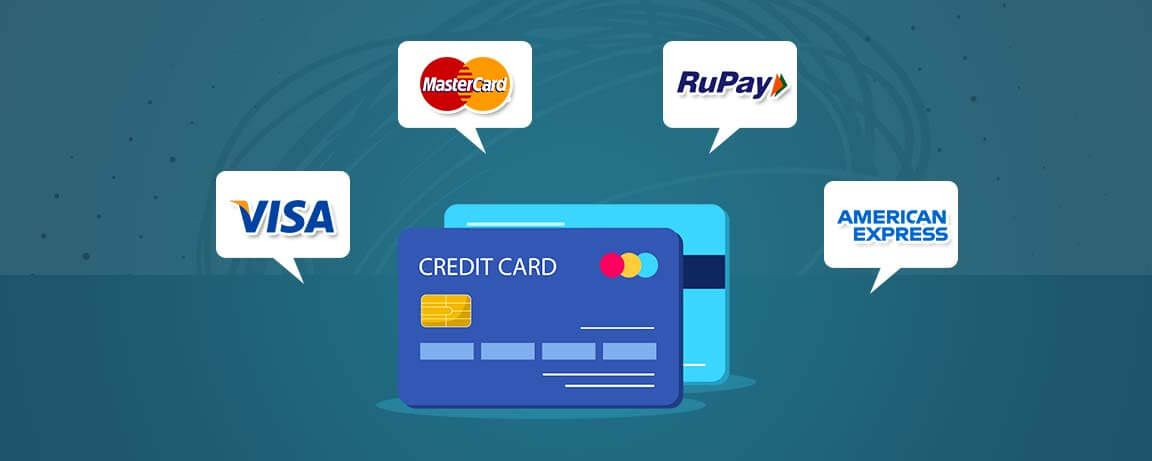

# **1. Business Objective**
This Machine Learning Model assesses credit card applications and determines whether an applicant should be approved for credit card or not. It reduces the manual workload and decision making time. By analyzing applicant data, the project aims to make informed, unbiased, and consistent approval decisions, enhancing customer experience, minimizing fraud and reducing risk for the financial instituion.



# **2. Import the required libraries**

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler, OneHotEncoder,OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,f1_score,classification_report,confusion_matrix,roc_curve,roc_auc_score

# **3. Get data and perform EDA**

In [229]:
# Loading the two datasets  application data and credit status data into pandas DataFrames
# and displaying the first few rows
df1 = pd.read_csv('Credit_card.csv')
df1.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  
0             NaN               2  
1             NaN               2  
2             NaN               2  
3             NaN               2  
4             NaN               2

In [230]:
df2 =  pd.read_csv('Credit_card_label.csv')
df2.head()

Ind_ID  label
0  5008827      1
1  5009744      1
2  5009746      1
3  5009749      1
4  5009752      1

In [231]:
# Merge DataFrames based on the 'Ind_ID' common column m
df = pd.merge(df1,df2,on='Ind_ID',how='inner')
df.head()      # Displaying the first five rows of merged dataframa

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0        -18772.0         365243             1           0      0         0   
1        -13557.0           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3        -13557.0           -586             1           1      1         0   
4        -13557.0           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [232]:
# Number of rows and columns in the final dataset
df.shape

(1548, 19)

In [233]:
# Get an overview of the dataset(columns, datatypes, non-null count)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [234]:
# Create a copy of the original dataframe df
df_new = df.copy()

In [235]:
# Convert 'Birthday_count' values to positive years
# if it is negative otherwise 'NaN'
df_new['Birthday_count'] =  df_new['Birthday_count'].apply(lambda x: -x/365.25 if x < 0 else np.nan)
df_new.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0       51.394935         365243             1           0      0         0   
1       37.117043           -586             1           1      1         0   
2             NaN           -586             1           1      1         0   
3       37.117043           -586             1           1      1         0   
4       37.117043           -586             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [236]:
# convert 'Employed_days' values to positive years
# if it is negative otherwise zero(0)
df_new['Employed_days'] = df_new['Employed_days'].apply(lambda x: -x/365.25 if x < 0 else 0)
df_new.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

   Birthday_count  Employed_days  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0       51.394935       0.000000             1           0      0         0   
1       37.117043       1.604381             1           1      1         0   
2             NaN       1.604381             1           1      1         0   
3       37.117043       1.604381             1           1      1         0   
4       37.117043       1.604381             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [237]:
# Rename columns 'Birthday_count' to 'age
# and 'Employed_days' to 'Emp_duration' in the dataframe new_df
df_new.rename(columns = {'Birthday_count':'age', 'Employed_days':'Emp_duration'}, inplace = True)
df_new.head()

Ind_ID GENDER Car_Owner Propert_Owner  CHILDREN  Annual_income  \
0  5008827      M         Y             Y         0       180000.0   
1  5009744      F         Y             N         0       315000.0   
2  5009746      F         Y             N         0       315000.0   
3  5009749      F         Y             N         0            NaN   
4  5009752      F         Y             N         0       315000.0   

            Type_Income         EDUCATION Marital_status       Housing_type  \
0             Pensioner  Higher education        Married  House / apartment   
1  Commercial associate  Higher education        Married  House / apartment   
2  Commercial associate  Higher education        Married  House / apartment   
3  Commercial associate  Higher education        Married  House / apartment   
4  Commercial associate  Higher education        Married  House / apartment   

         age  Emp_duration  Mobile_phone  Work_Phone  Phone  EMAIL_ID  \
0  51.394935      0.000000             1           0      0         0   
1  37.117043      1.604381             1           1      1         0   
2        NaN      1.604381             1           1      1         0   
3  37.117043      1.604381             1           1      1         0   
4  37.117043      1.604381             1           1      1         0   

  Type_Occupation  Family_Members  label  
0             NaN               2      1  
1             NaN               2      1  
2             NaN               2      1  
3             NaN               2      1  
4             NaN               2      1

In [238]:
# Get an overview of the new dataset(columns, datatypes, non-null count)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  age              1526 non-null   float64
 11  Emp_duration     1548 non-null   float64
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

The credit card application dataset contains 1548 entries and 19 columns. There are various data types, including integers, floats, and objects. Some columns have missing values, such as GENDER, Annual_income, age, and Type_Occupation.

In [239]:
# Summary statistics
df_new.describe()

Ind_ID     CHILDREN  Annual_income          age  Emp_duration  \
count  1.548000e+03  1548.000000   1.525000e+03  1526.000000   1548.000000   
mean   5.078920e+06     0.412791   1.913993e+05    43.916063      6.069757   
std    4.171759e+04     0.776691   1.132530e+05    11.579749      6.579835   
min    5.008827e+06     0.000000   3.375000e+04    21.095140      0.000000   
25%    5.045070e+06     0.000000   1.215000e+05    33.995893      1.182067   
50%    5.078842e+06     0.000000   1.665000e+05    42.878850      4.284736   
75%    5.115673e+06     1.000000   2.250000e+05    53.533196      8.691307   
max    5.150412e+06    14.000000   1.575000e+06    68.298426     40.758385   

       Mobile_phone   Work_Phone        Phone     EMAIL_ID  Family_Members  \
count        1548.0  1548.000000  1548.000000  1548.000000     1548.000000   
mean            1.0     0.208010     0.309432     0.092377        2.161499   
std             0.0     0.406015     0.462409     0.289651        0.947772   
min             1.0     0.000000     0.000000     0.000000        1.000000   
25%             1.0     0.000000     0.000000     0.000000        2.000000   
50%             1.0     0.000000     0.000000     0.000000        2.000000   
75%             1.0     0.000000     1.000000     0.000000        3.000000   
max             1.0     1.000000     1.000000     1.000000       15.000000   

             label  
count  1548.000000  
mean      0.113049  
std       0.316755  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

The dataset contains 1548 entries.
Key numerical features include CHILDREN, Annual_income, age, Emp_duration, Family_Members, and label.
On average, there are approximately 0.41 children, an annual income of around 191,399(Dollars), an average age of approximately 43.92 years, and an average employment duration of approximately 6.07 years.
The minimum values for these features vary, with the minimum annual income at 33,750(Dollars) and the minimum age at 21.10 years.
The maximum values for these features also vary, with a maximum of 14 children, an annual income of 1,575,000(Dollars), and an age of 68.30 years.
Other columns like Mobile_phone, Work_Phone, Phone, EMAIL_ID,  and label seem to have binary values (0 or 1).
The label column indicates approval (1) or rejection (0) for credit card applications.

In [240]:
# Checking for the number of missing values in each column
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

Among the columns, GENDER has 7 missing values (0.45%), Annual_income has 23 missing values (1.48%), Birthday_count has 22 missing values (1.42%), and Type_Occupation has 488 missing values (31.52%), while the remaining columns have no missing values.

<Axes: >

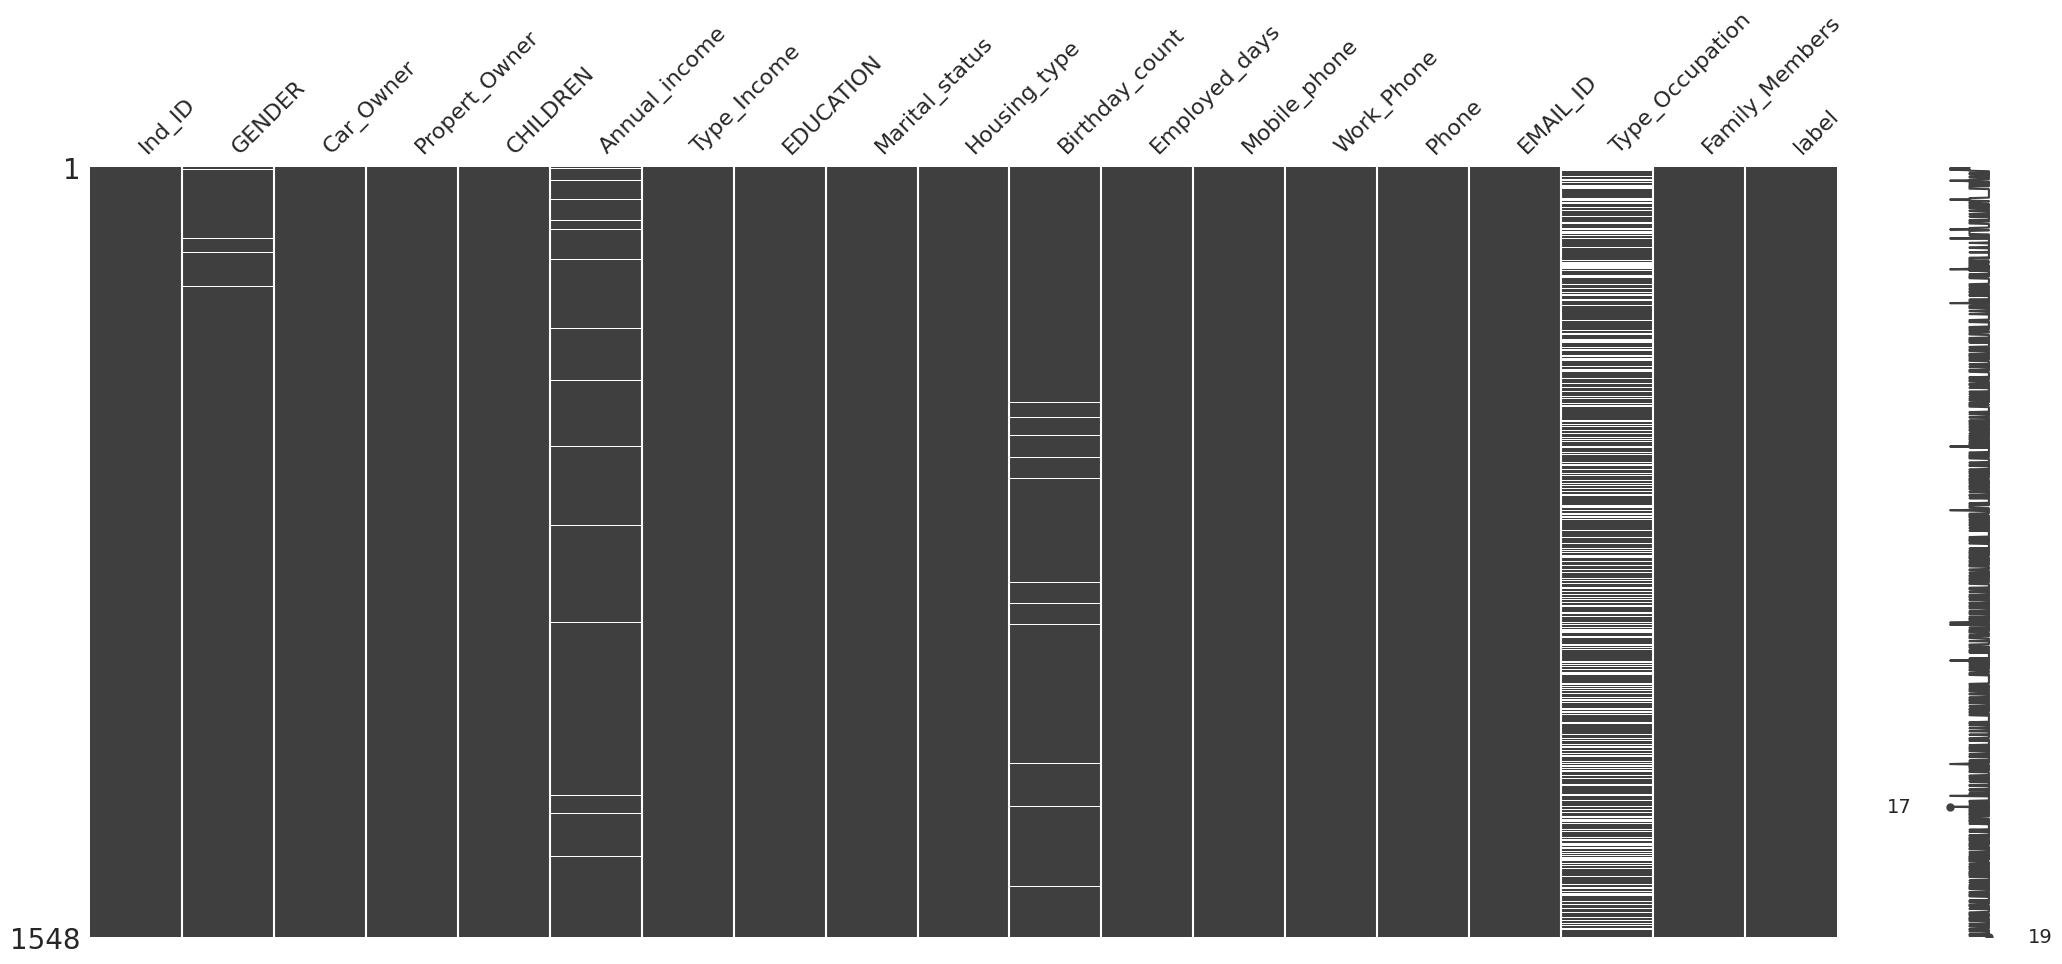

In [241]:
# Visualizing missing data using matrix
msno.matrix(df)

<Axes: >

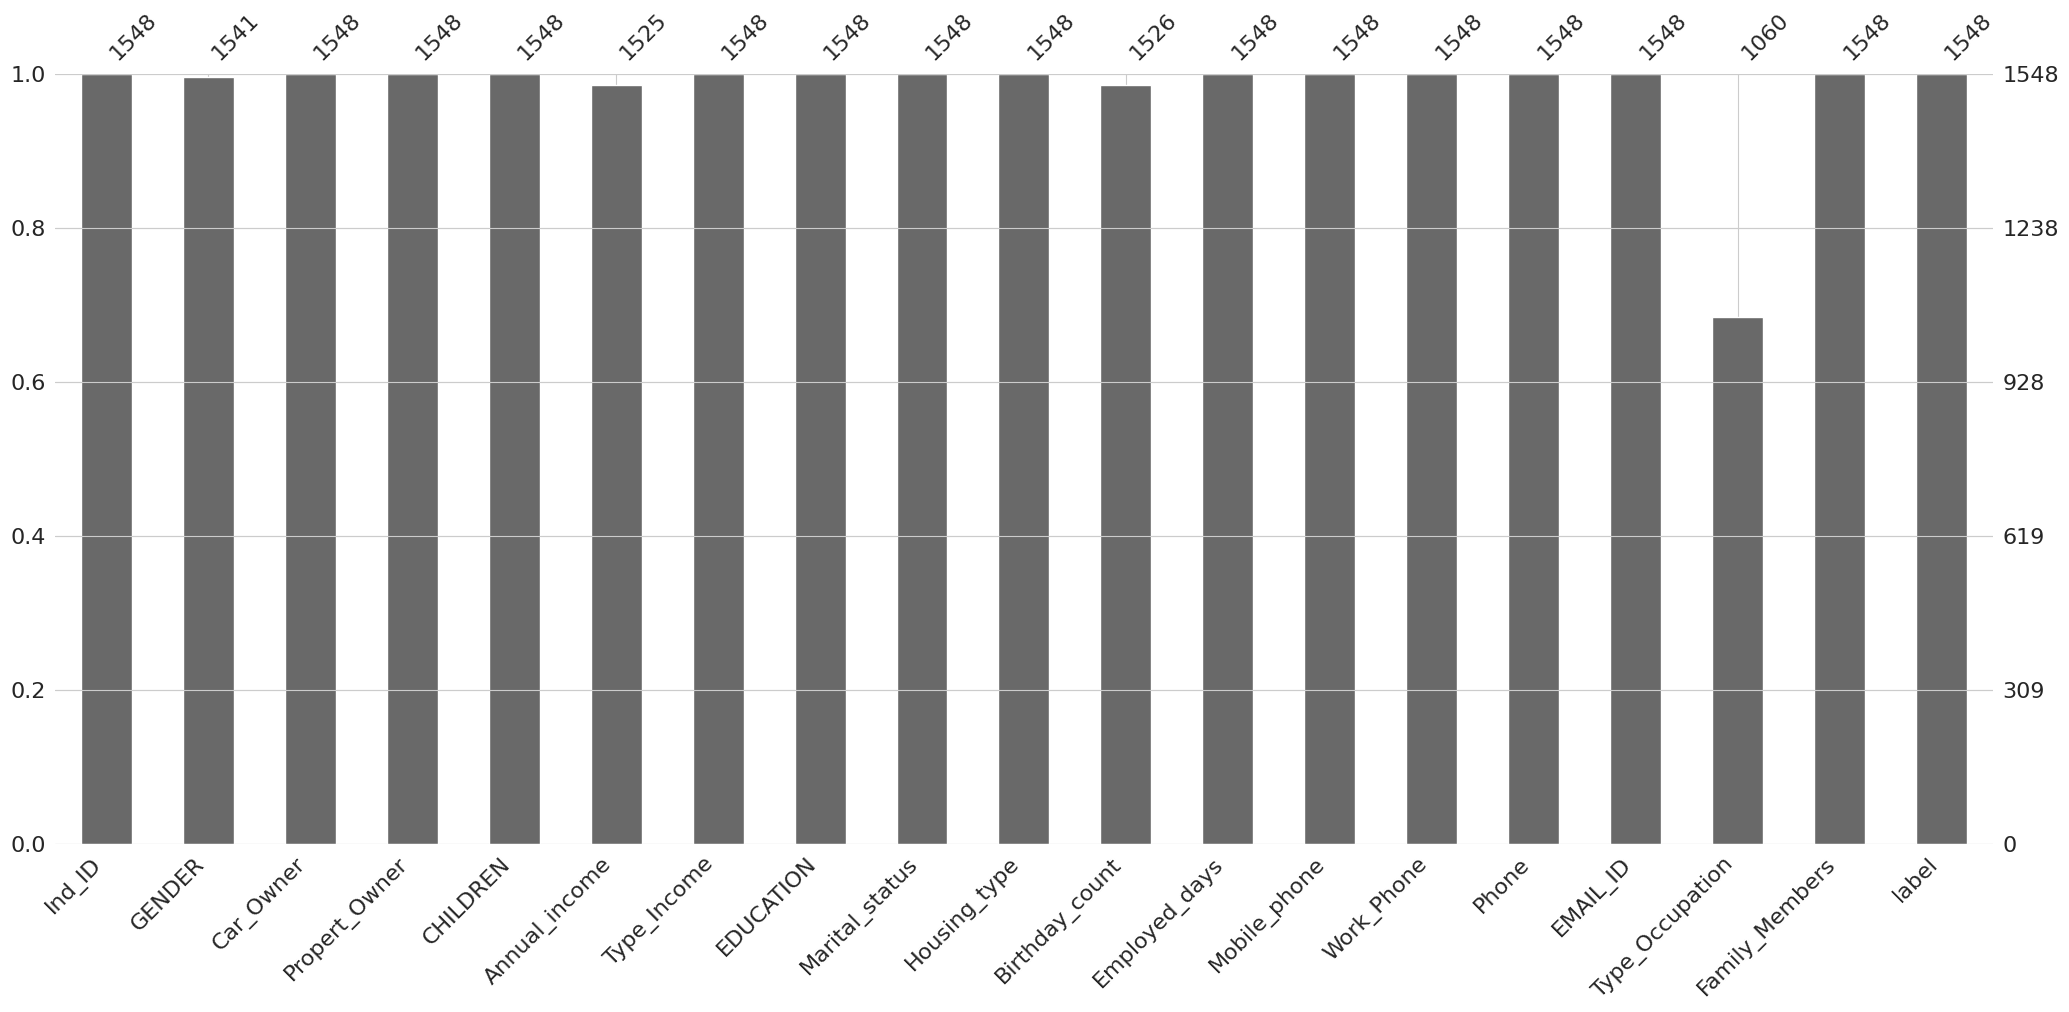

In [242]:
# Visualizing missing data using bar
msno.bar(df)

The MSNO bar plot and MSNO matrix visually confirm the same missing value patterns as described above.

In [243]:
# Get the count of distinct values in each column
df_new.nunique()

Ind_ID             1548
GENDER                2
Car_Owner             2
Propert_Owner         2
CHILDREN              6
Annual_income       115
Type_Income           4
EDUCATION             5
Marital_status        5
Housing_type          6
age                1270
Emp_duration        956
Mobile_phone          1
Work_Phone            2
Phone                 2
EMAIL_ID              2
Type_Occupation      18
Family_Members        7
label                 2
dtype: int64

In every column, except for 'Ind_ID,' there are duplicates. 'Ind_ID' contains a total of 1548 unique values because the total count of values and counts of distinct values is same, while all other columns have varying counts of distinct values that do not match the total count of values in those columns.

In [244]:
# Check for duplicate rows
df_new[df_new.duplicated()]

Empty DataFrame
Columns: [Ind_ID, GENDER, Car_Owner, Propert_Owner, CHILDREN, Annual_income, Type_Income, EDUCATION, Marital_status, Housing_type, age, Emp_duration, Mobile_phone, Work_Phone, Phone, EMAIL_ID, Type_Occupation, Family_Members, label]
Index: []

The resulting DataFrame clearly indicates that there are no duplicate rows in the provided DataFrame.

###**3.1 Univariate analysis**

##### **3.1.1 Label**

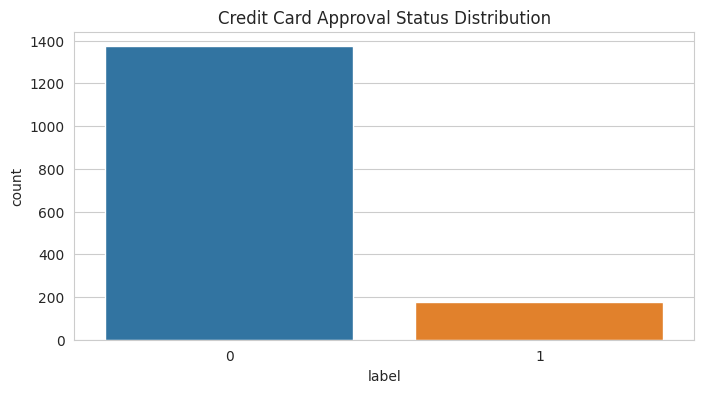

In [245]:
# visualizing the target feature distribution
plt.figure(figsize = (8,4))
sns.countplot(x = 'label', data = df)
plt.title('Credit Card Approval Status Distribution')
plt.show()

In [246]:
# find the count of each category in the target feature
category_counts = df['label'].value_counts()
print(category_counts)


0    1373
1     175
Name: label, dtype: int64


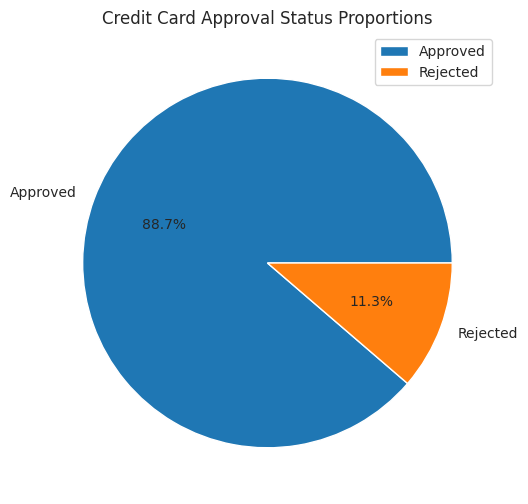

In [247]:
# visualizing the target feature proportions
plt.figure(figsize = (6,6))
plt.pie(category_counts, labels = ['Approved','Rejected'], autopct = '%1.1f%%')
plt.title('Credit Card Approval Status Proportions')
plt.legend(labels = ['Approved','Rejected'])
plt.show()

The dataset is imbalanced, as the target column "label" that is "credit card approval status" exhibits a significant disparity in the distribution of classes. Specifically, with 88.7% of the cases being labeled as "approved" and only 11.7% labeled as "rejected," there is a substantial imbalance in the representation of the two classes. This imbalance can potentially lead to challenges in training machine learning models, as they may become biased towards the majority class, making it harder for the model to accurately predict the minority class. Therefore, addressing class imbalance is essential to ensure fair and accurate model performance.

#### **3.1.2 Functions used to explore the features**

In [248]:
# Function to display the counts & frequency of categorical feaures
# and those discrete numerical features which are treated as categorical features
def categ_count_freq(df,feature):
  category_counts = df[feature].value_counts()
  category_counts_percent = df[feature].value_counts(normalize=True) * 100
  category_counts_concat = pd.concat([category_counts ,category_counts_percent ], axis=1)
  category_counts_concat.columns = ['Count', 'Frequency (%)']
  return category_counts_concat

In [249]:
# Function to visualise the distribution of categorical feaures and
#  those discrete numerical features which are treated as categorical features using countplot
def categ_countplot(df,feature):
  category_counts = df[feature].value_counts()
  if category_counts.shape[0]< 10 :
    plt.figure(figsize = (8,6))
  else:
    plt.figure(figsize = (12,6))
  sns.countplot(x = feature, data = df)
  plt.title(f'Distribution of {feature}')
  plt.xticks(rotation = 45)
  return plt.show()

In [250]:
# Function to visualize proportions of categorical feaures and
# those discrete numerical features which are treated as categorical features using pie chart
def categ_piechart(df,feature):
  category_counts = df[feature].value_counts()
  if category_counts.shape[0] < 5:
    plt.figure(figsize = (6,6))
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%')
  elif category_counts.shape[0] == 5:
    explode_1 = [0,0,0,0.8,0.8]
    plt.figure(figsize = (6,6))
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%',explode = explode_1)
  elif category_counts.shape[0] == 6:
    explode_2 = [0,0,0,0,0.8,0.8]
    plt.figure(figsize = (8,8))
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%',explode = explode_2)
  elif category_counts.shape[0] == 7:
    explode_3 = [0,0,0,0,0,0.8,0.8]
    plt.figure(figsize = (8,8))
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%',explode = explode_3)
  else:
    explode_4 = [0,0,0,0,0,0,0,0,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8]
    plt.figure(figsize = (10,10))
    plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%',explode =explode_4,textprops={'fontsize': 6})
  plt.title(f'Proportions of {feature}')
  return plt.show()

In [251]:
# Function to find the summary statistics
def cont_summary_stats(df,feature):
    print(f'Summary statistics of {feature}:\n{df[feature].describe()}')

In [252]:
# Function to visualize the distribution of continuous feature
# along with skewness using histogram
def cont_histogram(df,feature):
    plt.figure(figsize = (10,6))
    sns.histplot(data = df, x = feature, bins = 10, kde =True)
    plt.title(f'Histogram of {feature}')
    plt.show()

In [253]:
# Function to visualize the summary of the distribution of the continuous features
# and the discrete features along with potential outliers using box plot
def cont_disc_boxplot(df,feature):
    plt.figure(figsize = (10,6))
    sns.boxplot(x= df[feature])
    sns.set_style('whitegrid')
    plt.title(f'Boxplot of {feature}')
    plt.show()

#### **3.1.3 Gender**

In [254]:
categ_count_freq(df,'GENDER')

Count  Frequency (%)
F    973      63.140818
M    568      36.859182

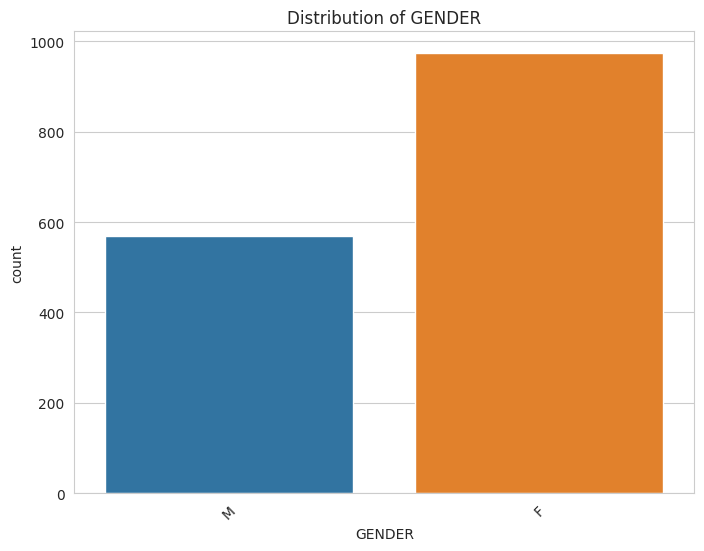

In [255]:
categ_countplot(df,'GENDER')

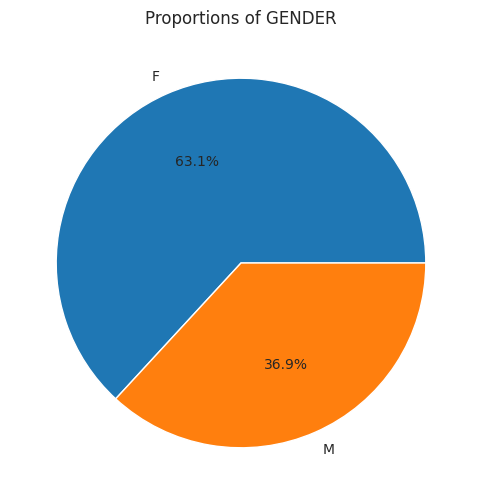

In [256]:
categ_piechart(df,'GENDER')

 Females make up the majority of the applicants, accounting for approximately 63.14% of the total applicants, while males make up the remaining 36.86%. This indicates that there are more female credit card applicants in this dataset.

#### **3.1.4 Car Owner**

In [257]:
categ_count_freq(df,'Car_Owner')

Count  Frequency (%)
N    924      59.689922
Y    624      40.310078

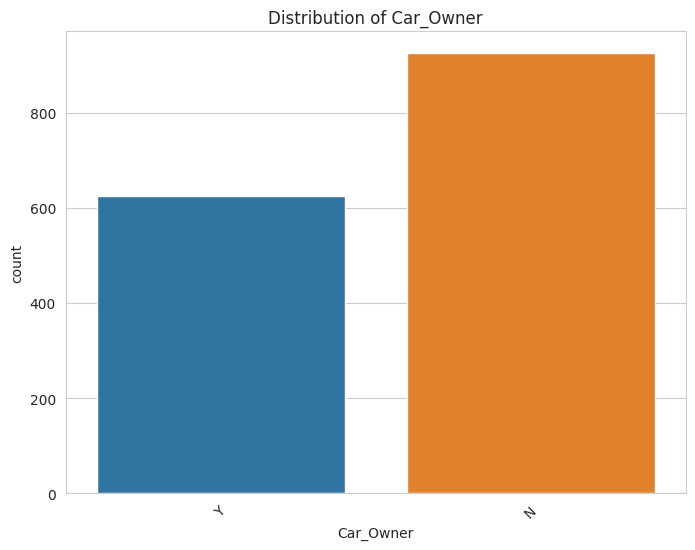

In [258]:
categ_countplot(df,'Car_Owner')

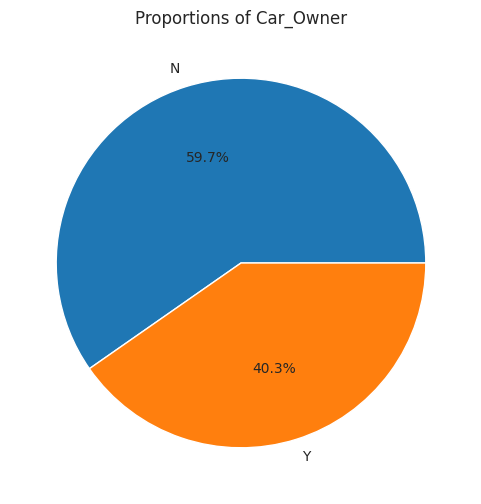

In [259]:
categ_piechart(df,'Car_Owner')


The dataset shows that a majority of credit card applicants, approximately 59.69%, do not own a car. In contrast, about 40.31% of applicants are car owners. This suggests that a significant portion of credit card applicants does not possess a vehicle.

#### **3.1.5 Property Owner**

In [260]:
categ_count_freq(df,'Propert_Owner')

Count  Frequency (%)
Y   1010      65.245478
N    538      34.754522

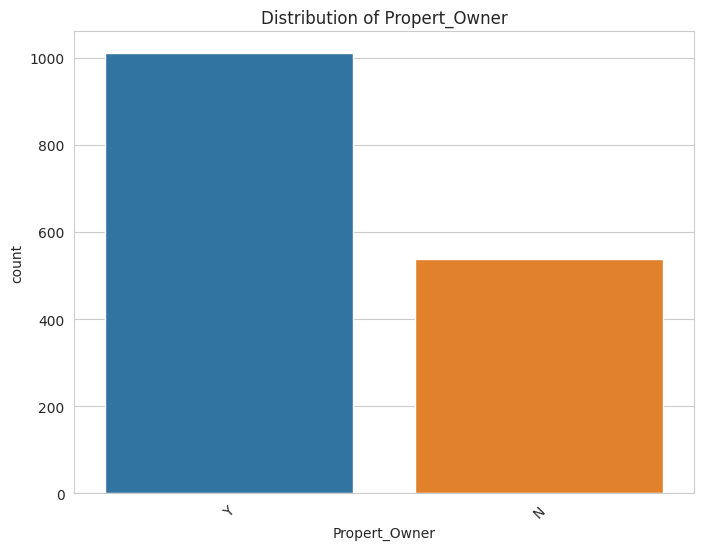

In [261]:
categ_countplot(df,'Propert_Owner')

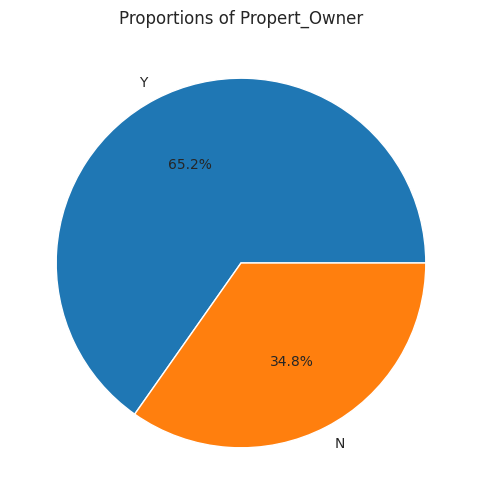

In [262]:
categ_piechart(df,'Propert_Owner')

The dataset reveals that a majority of credit card applicants, approximately 65.25%, own some form of property, while about 34.75% do not own property. This suggests that a significant portion of credit card applicants in this dataset are property owners.

#### **3.1.6 Income Type**

In [263]:
categ_count_freq(df,'Type_Income')

Count  Frequency (%)
Working                 798      51.550388
Commercial associate    365      23.578811
Pensioner               269      17.377261
State servant           116       7.493540

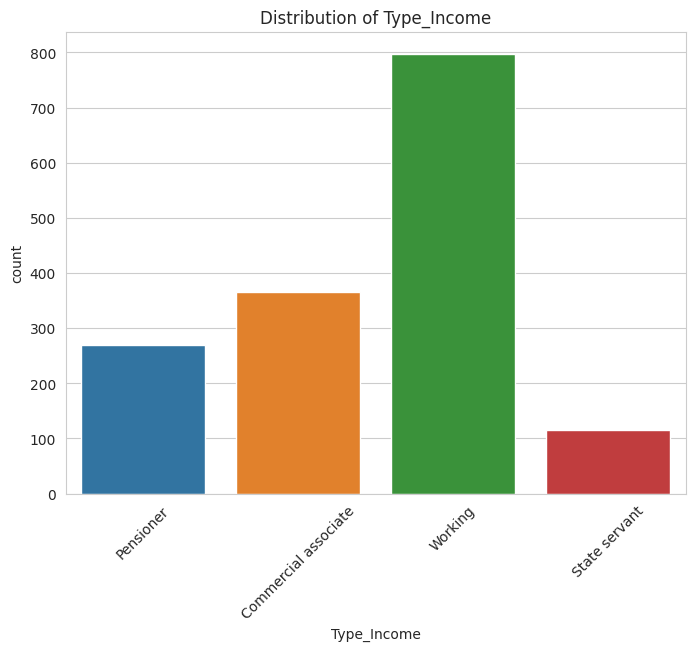

In [264]:
categ_countplot(df,'Type_Income')

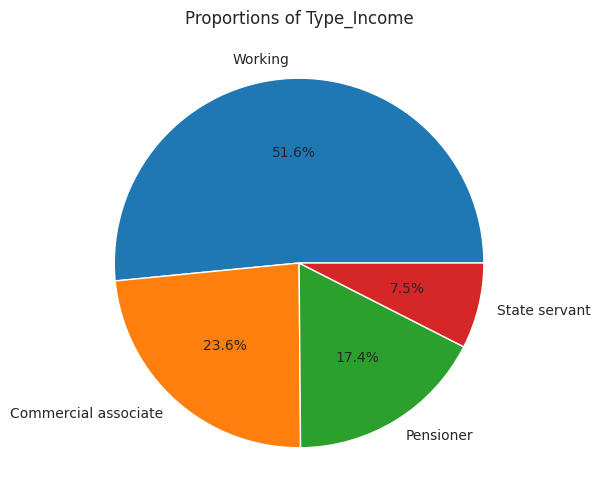

In [265]:
categ_piechart(df,'Type_Income')

The dataset shows that credit card applicants have various income types. The majority of applicants, approximately 51.55%, are categorized as "Working," followed by "Commercial associate" at 23.58%, "Pensioner" at 17.38%, and "State servant" at 7.49%. This distribution suggests a diverse applicant pool in terms of income sources.

#### **3.1.7 Education**

In [266]:
categ_count_freq(df,'EDUCATION')

Count  Frequency (%)
Secondary / secondary special   1031      66.602067
Higher education                 426      27.519380
Incomplete higher                 68       4.392765
Lower secondary                   21       1.356589
Academic degree                    2       0.129199

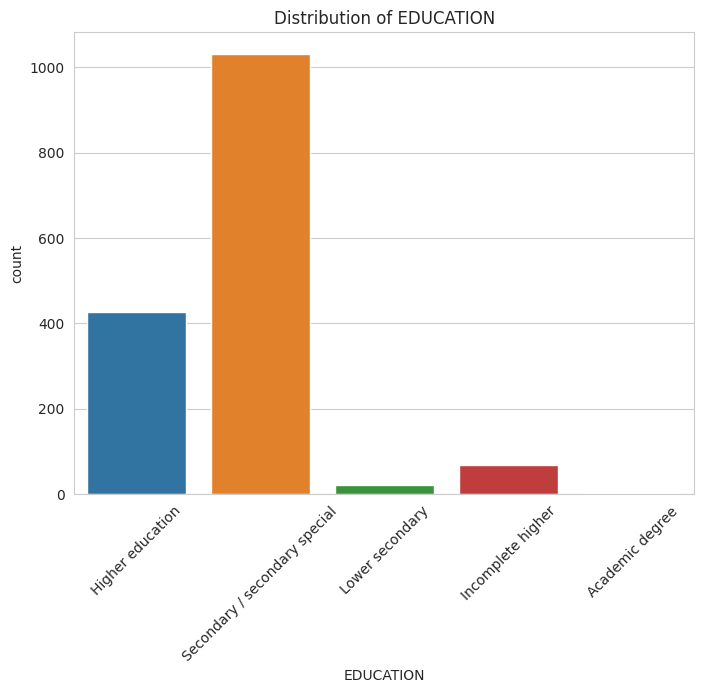

In [267]:
categ_countplot(df,'EDUCATION')

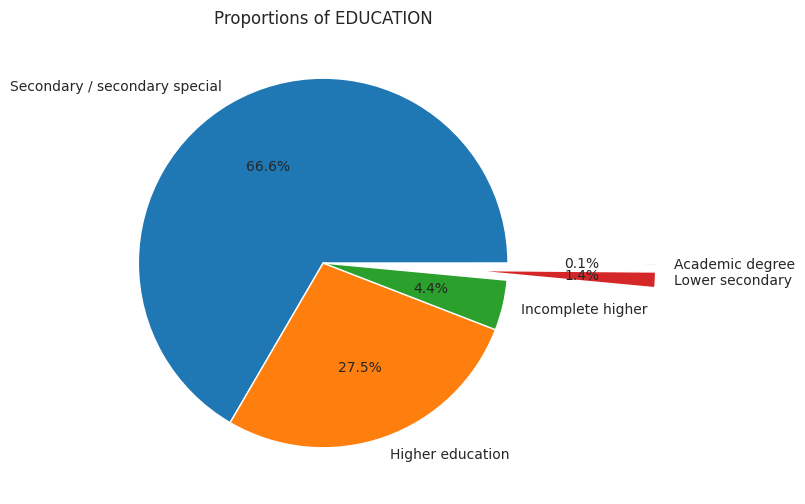

In [268]:
categ_piechart(df,'EDUCATION')

Credit card applicants have varying levels of education. The majority of applicants, approximately 66.60%, have completed "Secondary / secondary special" education. "Higher education" follows at 27.52%, "Incomplete higher" at 4.39%, "Lower secondary" at 1.36%, and "Academic degree" at 0.13%. This distribution highlights the educational diversity among applicants.

#### **3.1.7 Marital Status**

In [269]:
categ_count_freq(df,'Marital_status')

Count  Frequency (%)
Married                1049      67.764858
Single / not married    227      14.664083
Civil marriage          101       6.524548
Separated                96       6.201550
Widow                    75       4.844961

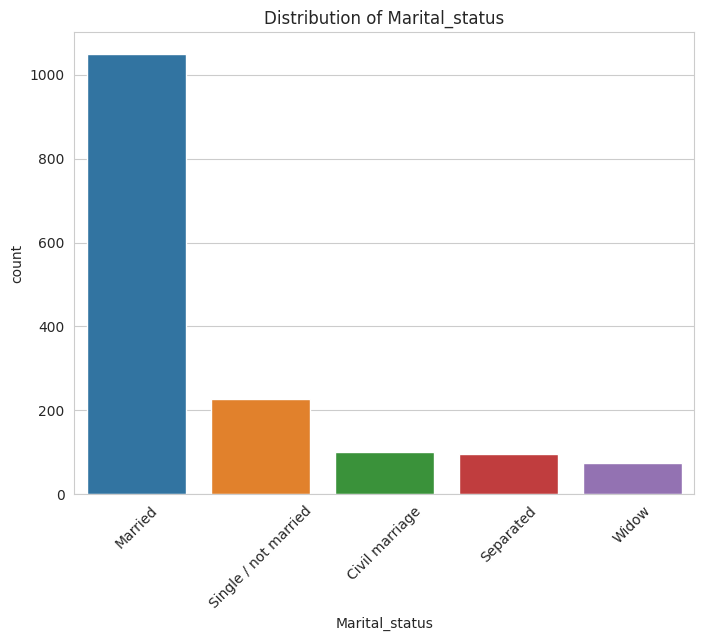

In [270]:
categ_countplot(df,'Marital_status')

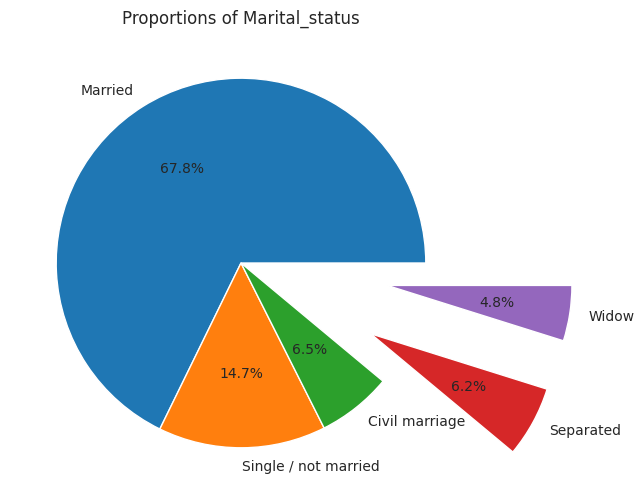

In [271]:
categ_piechart(df,'Marital_status')

The credit card applicants have diverse marital statuses. The majority of applicants, approximately 67.76%, are "Married." Other marital statuses include "Single / not married" at 14.66%, "Civil marriage" at 6.52%, "Separated" at 6.20%, and "Widow" at 4.84%. This distribution highlights the variety of marital situations among applicants.

#### **3.1.8 Housing Type**

In [272]:
categ_count_freq(df,'Housing_type')

Count  Frequency (%)
House / apartment     1380      89.147287
With parents            80       5.167959
Municipal apartment     53       3.423773
Rented apartment        21       1.356589
Office apartment         9       0.581395
Co-op apartment          5       0.322997

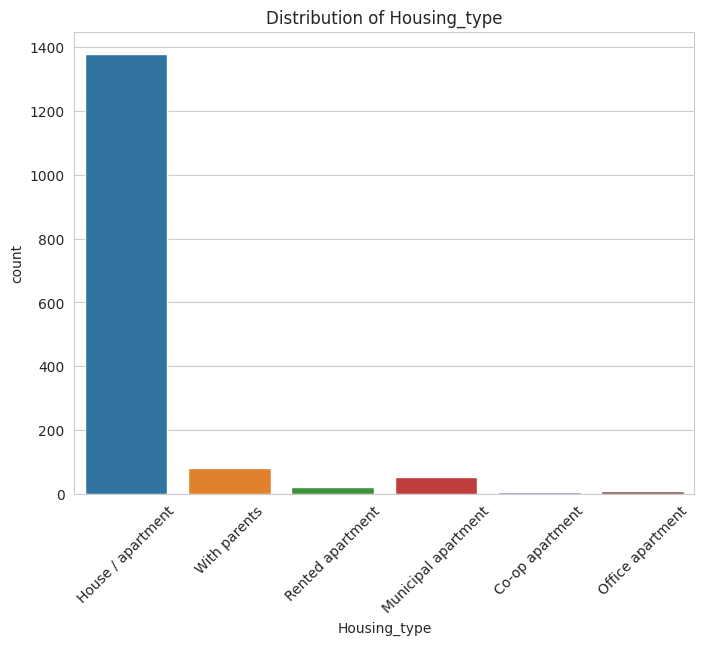

In [273]:
categ_countplot(df,'Housing_type')

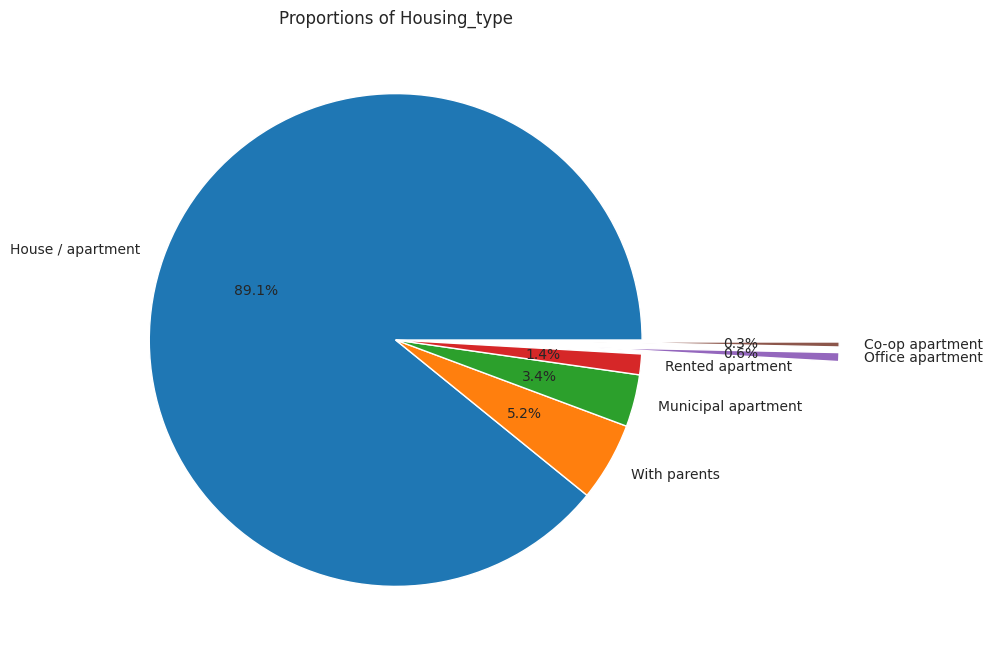

In [274]:
categ_piechart(df,'Housing_type')

 The credit card applicants have various housing situations. The majority of applicants, approximately 89.15%, live in a "House / apartment." Other housing situations include "With parents" at 5.17%, "Municipal apartment" at 3.42%, "Rented apartment" at 1.36%, "Office apartment" at 0.58%, and "Co-op apartment" at 0.32%. This distribution highlights the diversity of housing arrangements among applicants.

#### **3.1.9 Occupation**

In [275]:
categ_count_freq(df,'Type_Occupation')

Count  Frequency (%)
Laborers                 268      25.283019
Core staff               174      16.415094
Managers                 136      12.830189
Sales staff              122      11.509434
Drivers                   86       8.113208
High skill tech staff     65       6.132075
Medicine staff            50       4.716981
Accountants               44       4.150943
Security staff            25       2.358491
Cleaning staff            22       2.075472
Cooking staff             21       1.981132
Private service staff     17       1.603774
Secretaries                9       0.849057
Low-skill Laborers         9       0.849057
Waiters/barmen staff       5       0.471698
HR staff                   3       0.283019
IT staff                   2       0.188679
Realty agents              2       0.188679

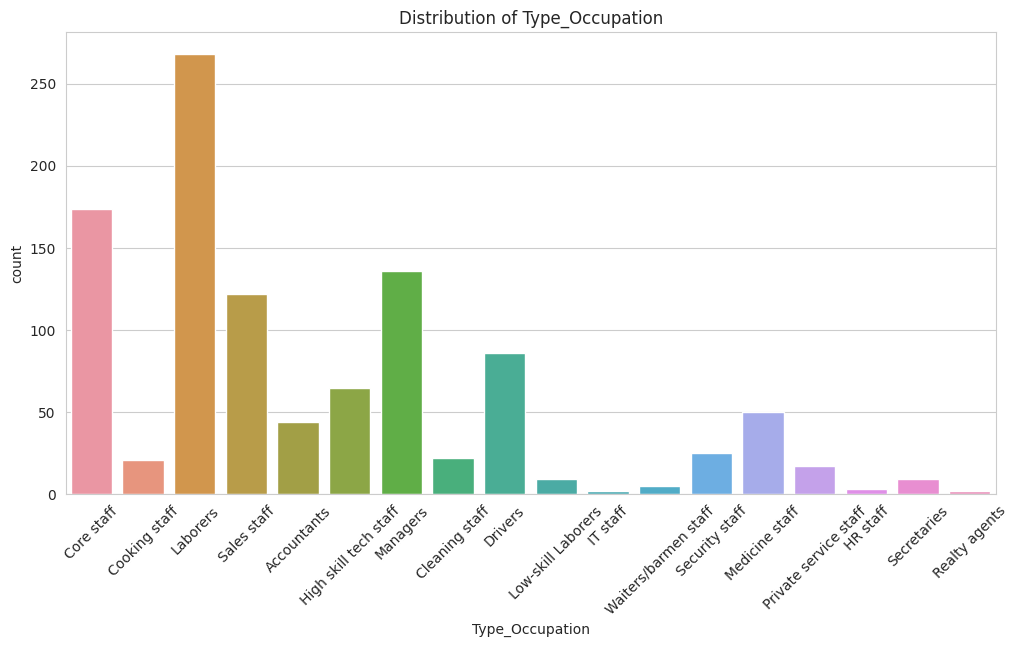

In [276]:
categ_countplot(df,'Type_Occupation')

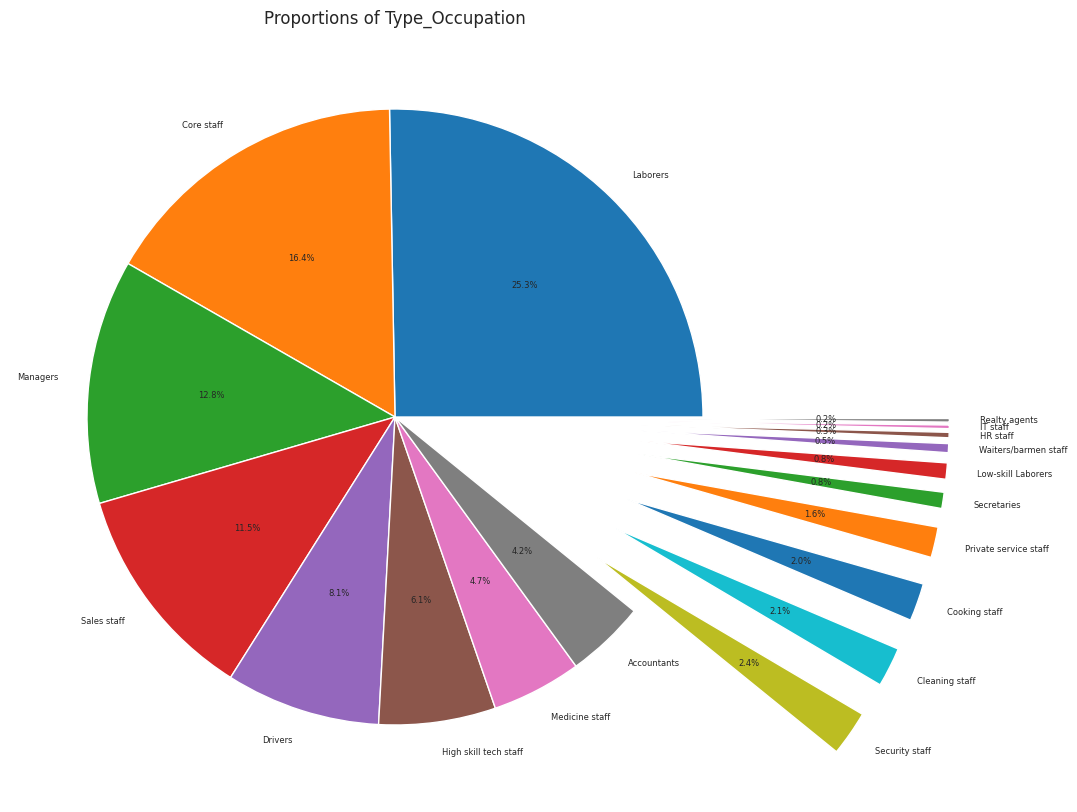

In [277]:
categ_piechart(df,'Type_Occupation')

The dataset shows that credit card applicants have a wide range of occupations. Various occupation categories are represented, including "Laborers," "Core staff," "Managers," "Sales staff," "Drivers," "High skill tech staff," "Medicine staff," "Accountants," "Security staff," "Cleaning staff," "Cooking staff," "Private service staff," "Secretaries," "Low-skill Laborers," "Waiters/barmen staff," "HR staff," "IT staff," and "Realty agents." This diversity highlights the variety of occupations among applicants.

#### **3.1.10 Mobile Phone**

In [278]:
categ_count_freq(df,'Mobile_phone')

Count  Frequency (%)
1   1548          100.0

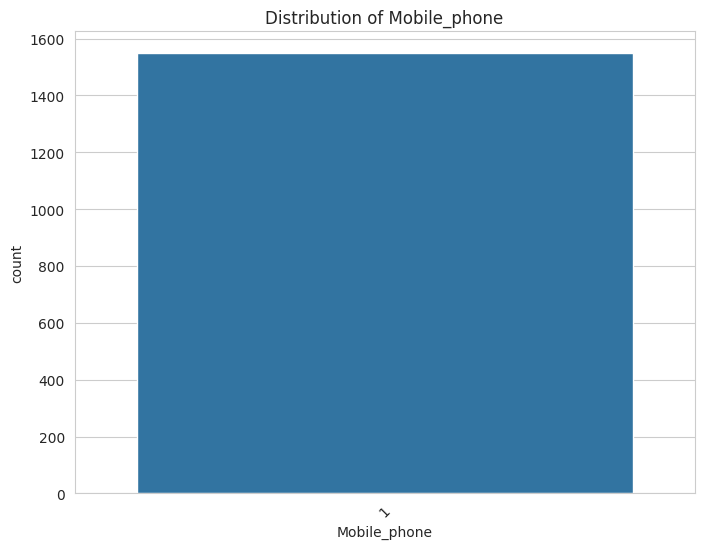

In [279]:
categ_countplot(df,'Mobile_phone')

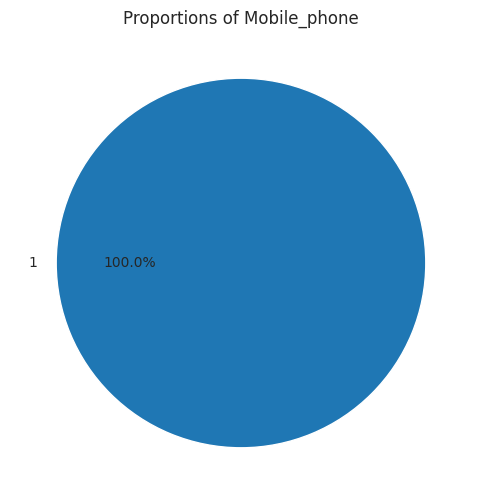

In [280]:
categ_piechart(df,'Mobile_phone')

Every credit card applicant in the dataset has a mobile phone.
So it does not provide useful information for the model because it doesn't contribute to any differences or distinctions among the data points.

#### **3.1.11 Work Phone**

In [281]:
categ_count_freq(df,'Work_Phone')

Count  Frequency (%)
0   1226      79.198966
1    322      20.801034

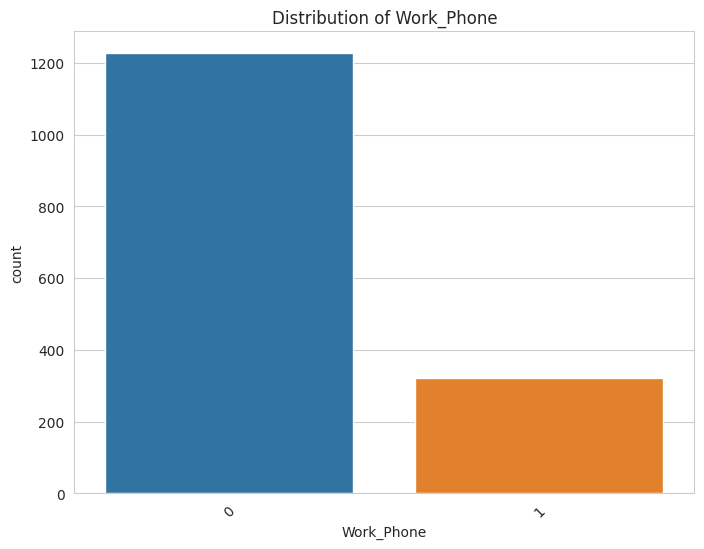

In [282]:
categ_countplot(df,'Work_Phone')

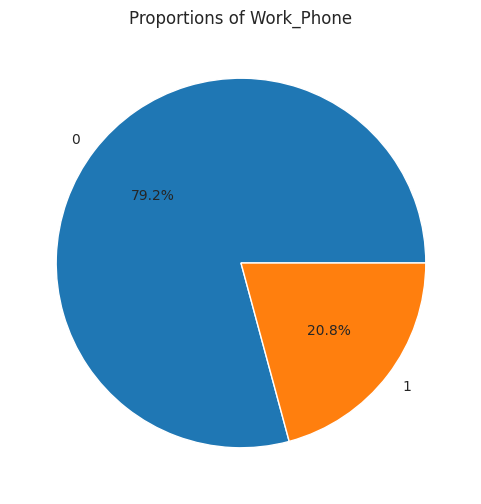

In [283]:
categ_piechart(df,'Work_Phone')

Approximately 79.20% of credit card applicants do not have a work phone, while about 20.80% of applicants have a work phone. This distribution suggests that a majority of applicants do not possess a work phone.

#### **3.1.12 Phone**

In [284]:
categ_count_freq(df,'Phone')

Count  Frequency (%)
0   1069      69.056848
1    479      30.943152

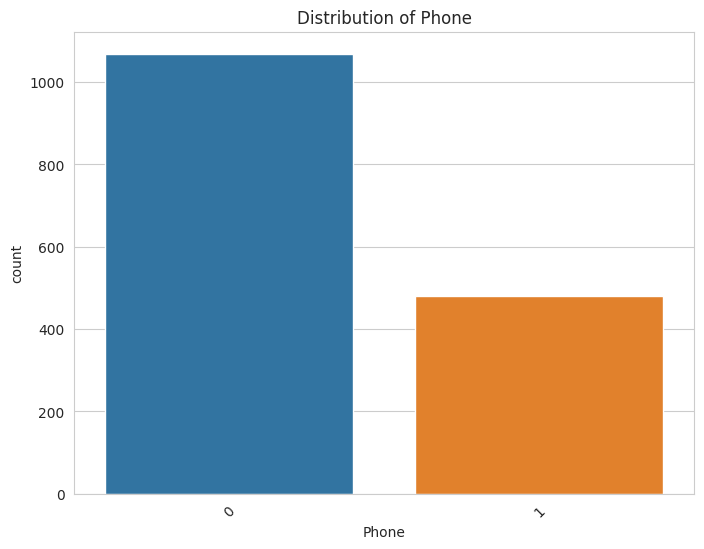

In [285]:
categ_countplot(df,'Phone')

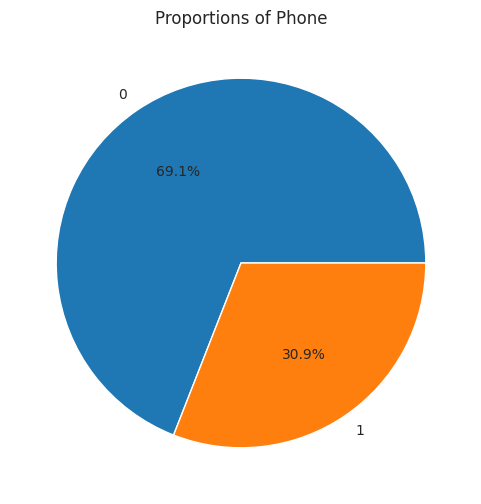

In [286]:
categ_piechart(df,'Phone')

 The dataset indicates that approximately 69.06% of credit card applicants do not have a phone, while about 30.94% of applicants have a phone. This distribution suggests that a significant portion of applicants does not possess a phone.

#### **3.1.13 Email ID**

In [287]:
categ_count_freq(df,'EMAIL_ID')

Count  Frequency (%)
0   1405      90.762274
1    143       9.237726

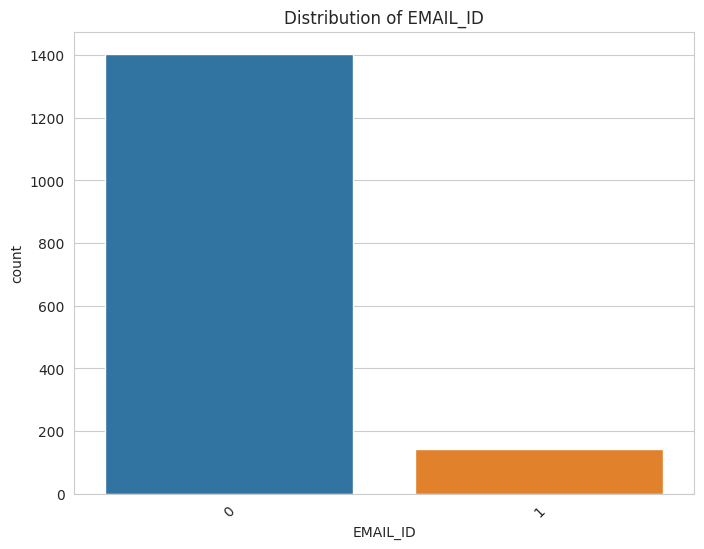

In [288]:
categ_countplot(df,'EMAIL_ID')

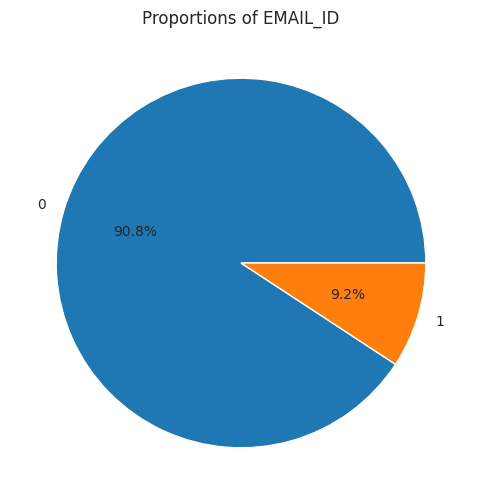

In [289]:
categ_piechart(df,'EMAIL_ID')

Approximately 90.76% of credit card applicants do not have an email address, while about 9.24% of applicants have an email address. This distribution suggests that a significant majority of applicants do not provide an email address as part of their application.

#### **3.1.14 Children**

In [290]:
categ_count_freq(df,'CHILDREN')

Count  Frequency (%)
0    1091      70.478036
1     305      19.702842
2     134       8.656331
3      16       1.033592
4       1       0.064599
14      1       0.064599

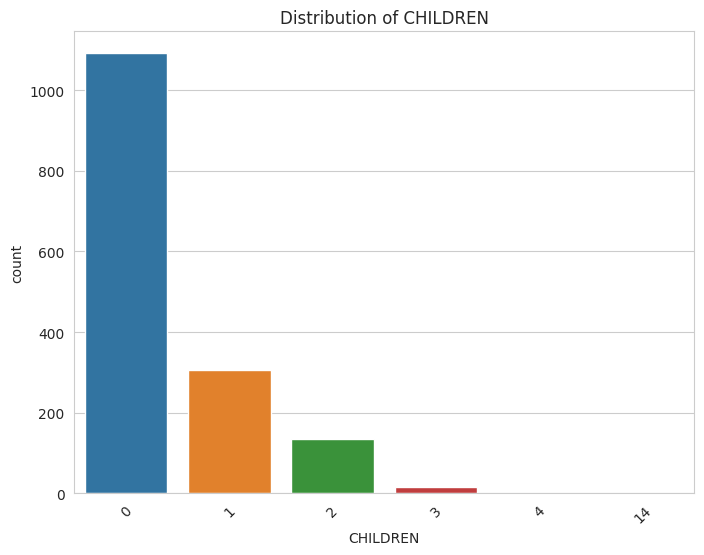

In [291]:
categ_countplot(df,'CHILDREN')

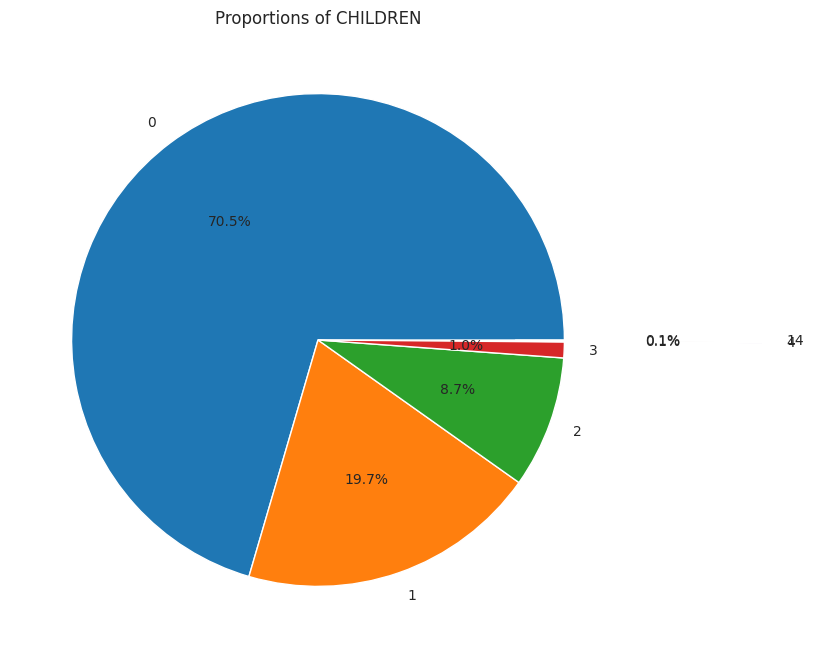

In [292]:
categ_piechart(df,'CHILDREN')

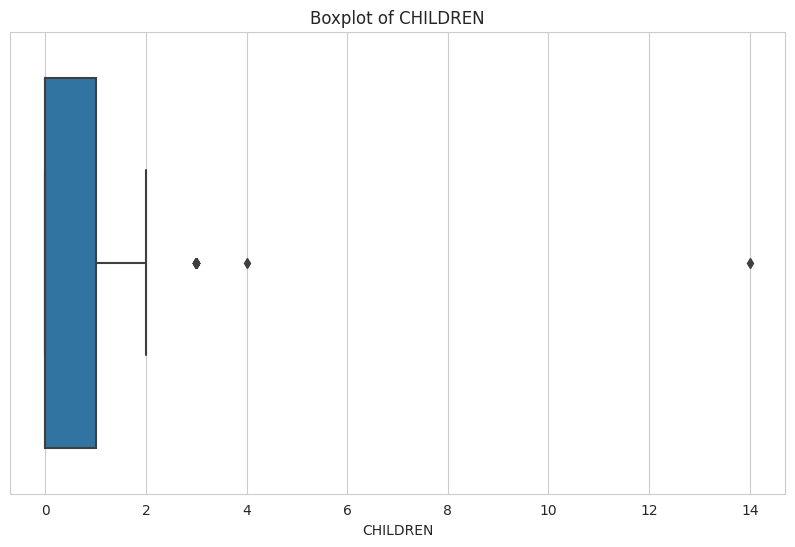

In [293]:
cont_disc_boxplot(df,'CHILDREN')

The largest group of applicants (70.48%) does not have any children (count = 0). This suggests that a significant portion of applicants is childless.While most applicants have no children or only one child, there is a smaller group with multiple children (counts of 2, 3, and 4), although the percentages are relatively lower. The dataset also contains outliers with very high child counts, such as 14.

#### **3.1.15 Family Members**

In [294]:
categ_count_freq(df,'Family_Members')

Count  Frequency (%)
2     802      51.808786
1     334      21.576227
3     268      17.312661
4     127       8.204134
5      15       0.968992
6       1       0.064599
15      1       0.064599

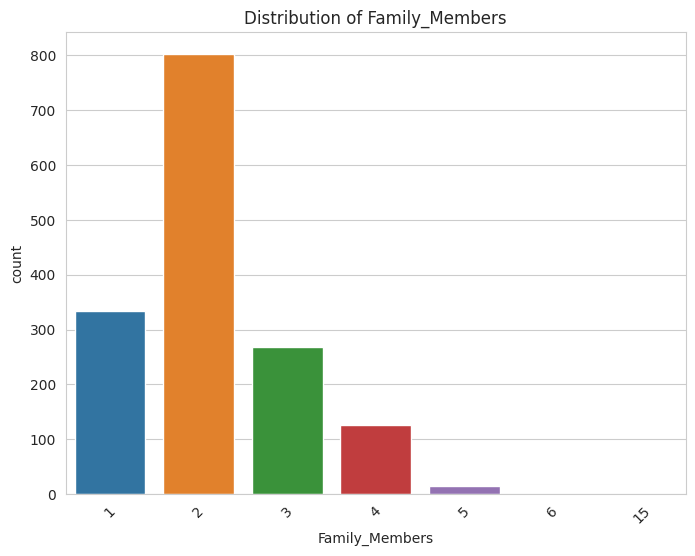

In [295]:
categ_countplot(df,'Family_Members')

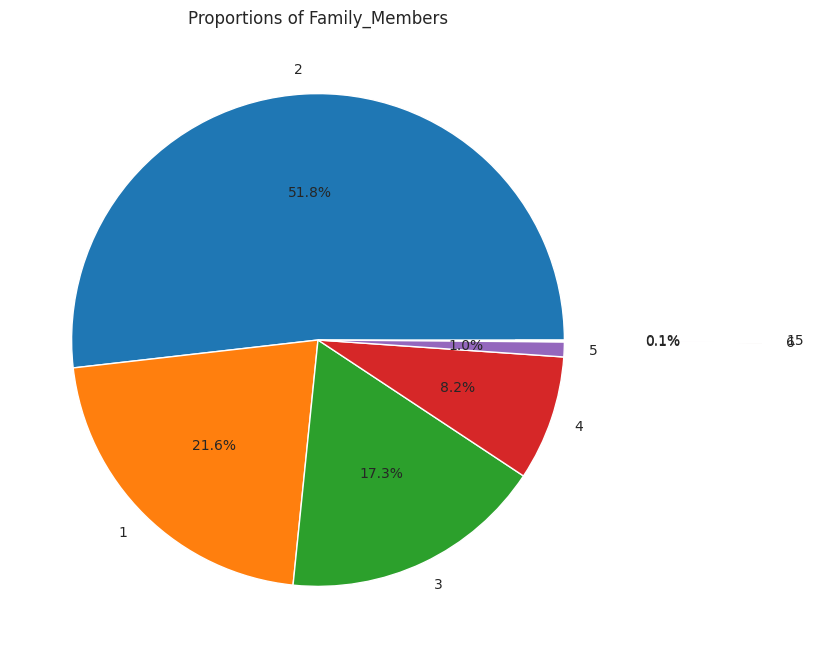

In [296]:
categ_piechart(df,'Family_Members')

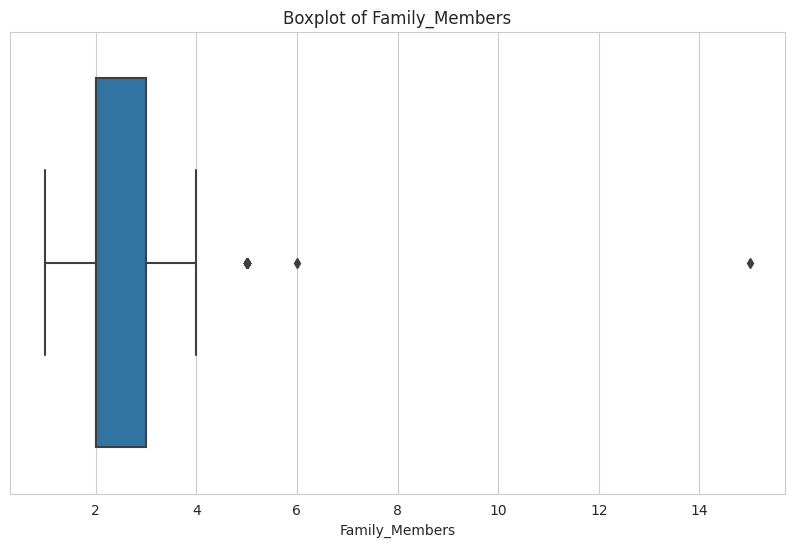

In [297]:
cont_disc_boxplot(df,'Family_Members')

The most common family size among applicants is 2 members (approximately 51.81%), indicating that many applicants have a relatively small family unit consisting of themselves and one other family member.

A significant portion of applicants (21.58%) have a family size of 1 member, which implies that they are applying for credit cards as single individuals without dependents or other family members.

The dataset also contains outliers with very high Family_Members counts, such as 15.

#### 3**.1.16 Annual Income**

In [298]:
cont_summary_stats(df,'Annual_income')

Summary statistics of Annual_income:
count    1.525000e+03
mean     1.913993e+05
std      1.132530e+05
min      3.375000e+04
25%      1.215000e+05
50%      1.665000e+05
75%      2.250000e+05
max      1.575000e+06
Name: Annual_income, dtype: float64


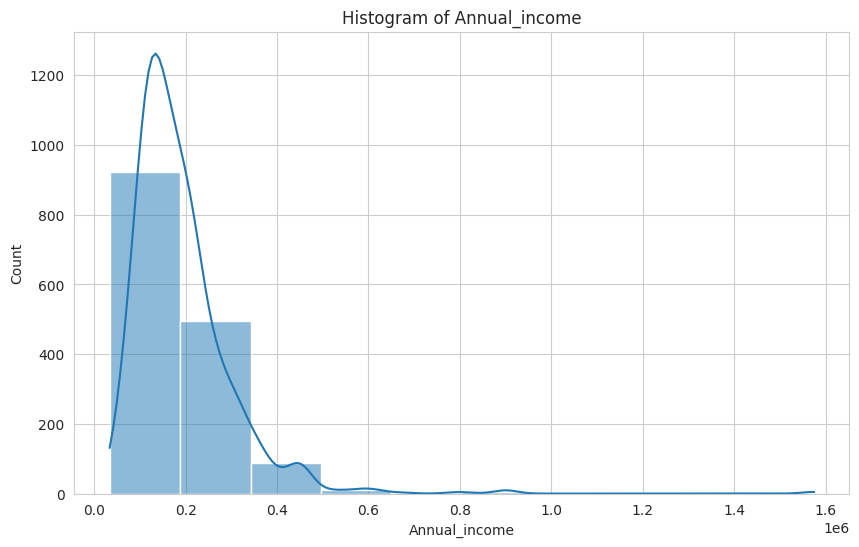

In [299]:
cont_histogram(df,'Annual_income')

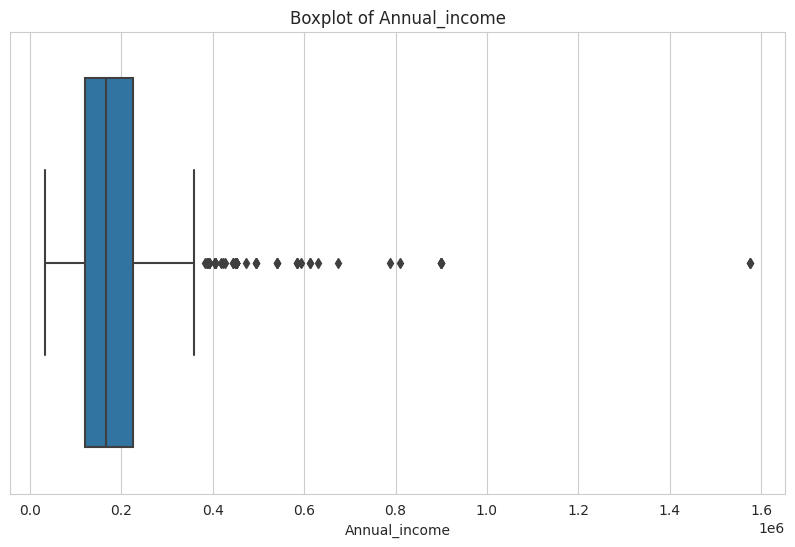

In [300]:
cont_disc_boxplot(df,'Annual_income')

In [301]:
# Calculate the skewness of the 'Annual_income' column
df_new['Annual_income'].skew()

3.9245642452364167

The mean (average) annual income among applicants is approximately $191,399.

The standard deviation (std) of approximately $113,253 indicates that there is variability in annual incomes among the applicants.

The minimum annual income in the dataset is 33750; while the maximum annual income is $1,575,000. This wide income range reflects diversity in income levels among the applicants.

The quartile values (25%, 50%, and 75%) provide insights into the distribution of annual incomes. The 25th percentile (Q1) is approximately 121,500, the median (50th percentile or Q2) is approximately 166,500, and the 75th percentile (Q3) is approximately $225,000. These values help understand the spread of incomes and the income distribution.

There are many outliers in the Annual income column.There is a slight rightward (positive) skew in the distribution of annual incomes suggested by skewness value. But the visuals are suggesting that the rightward skewness is a bit larger than that.This is just because skewness vale is sensitive to extreme values or outliers in the dataset.

#### **3.1.17 Age**

In [302]:
cont_summary_stats(df_new,'age')

Summary statistics of age:
count    1526.000000
mean       43.916063
std        11.579749
min        21.095140
25%        33.995893
50%        42.878850
75%        53.533196
max        68.298426
Name: age, dtype: float64


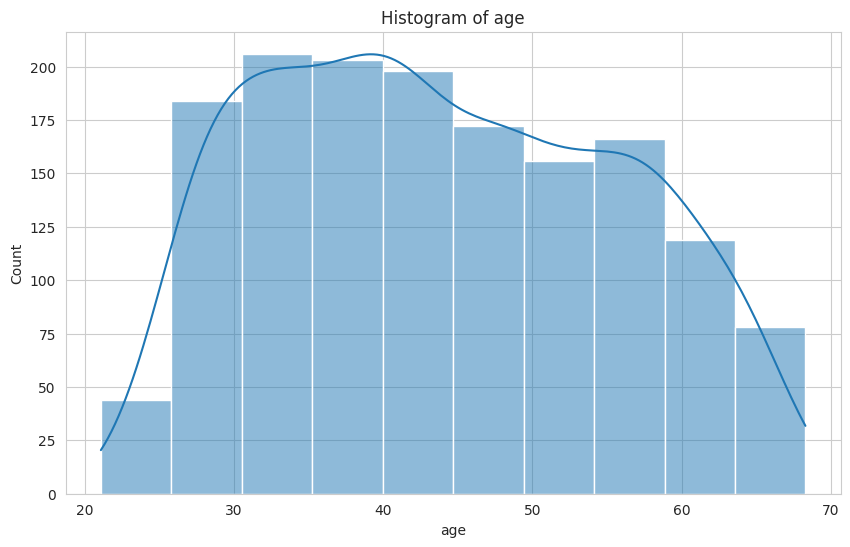

In [303]:
cont_histogram(df_new,'age')

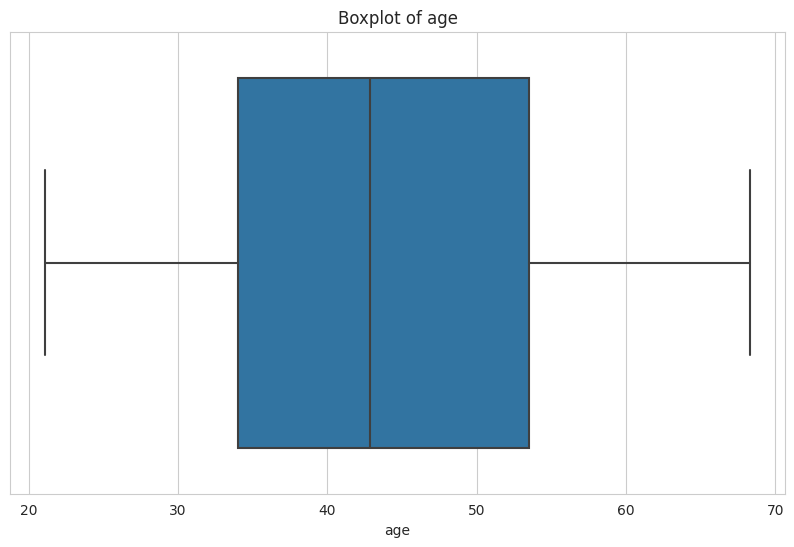

In [304]:
cont_disc_boxplot(df_new,'age')

In [305]:
# Calculate the skewness of the 'age' column
df_new['age'].skew()

0.17108666821145133

The mean age of credit card applicants is approximately 43.92 years. This suggests that, on average, credit card applicants in the dataset are in their mid-40s.The mean age of credit card applicants is approximately 43.92 years. This suggests that, on average, credit card applicants in the dataset are in their mid-40s.

The standard deviation (std) of approximately 11.58 indicates that there is variability in the ages of the applicants. This suggests that the age distribution is not tightly clustered around the mean but rather has some spread.

 The minimum and maximum ages in the dataset are approximately 21.10 years and 68.30 years, respectively. This wide age range indicates that applicants of various age groups are included in the dataset.

 The quartile values (25%, 50%, and 75%) provide insights into the distribution of ages. The 25th percentile (Q1) is approximately 34 years, the median (50th percentile or Q2) is approximately 42.88 years, and the 75th percentile (Q3) is approximately 53.53 years. These values help in understanding the spread of ages and the location of the middle 50% of the data.

 It seems there is no outlier in the age column. The skewness value is suggesting the age distribution is not perfecly normal(symmetrical), there is minor leftward skewness in the age distribution but it is not extreme.But the visuals are suggesting there is a slight positive(righward) skewness.This is because the skewness value is based on the third moment of the distribution and is a mathematical measure. It may not always align perfectly with visual impressions, especially if the skewness is relatively small.



#### **3.1.18 Employment Duration**

In [306]:
cont_summary_stats(df_new,'Emp_duration')

Summary statistics of Emp_duration:
count    1548.000000
mean        6.069757
std         6.579835
min         0.000000
25%         1.182067
50%         4.284736
75%         8.691307
max        40.758385
Name: Emp_duration, dtype: float64


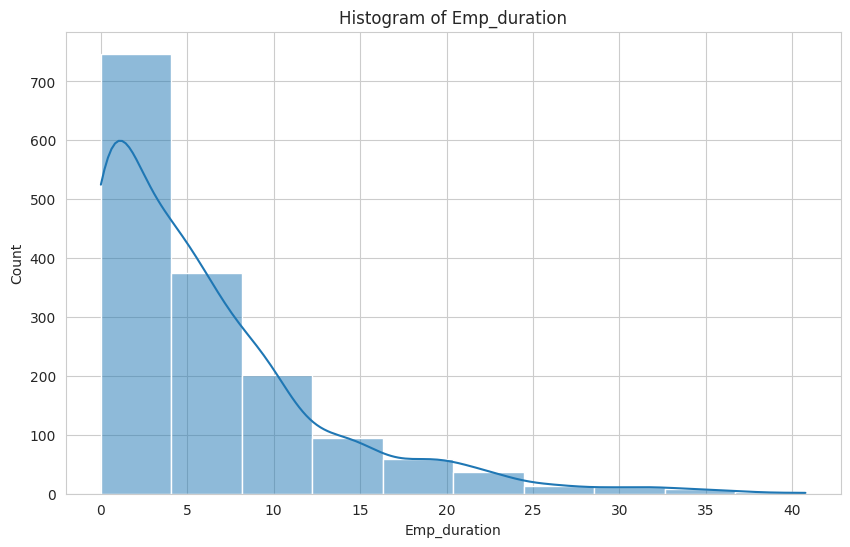

In [307]:
cont_histogram(df_new,'Emp_duration')

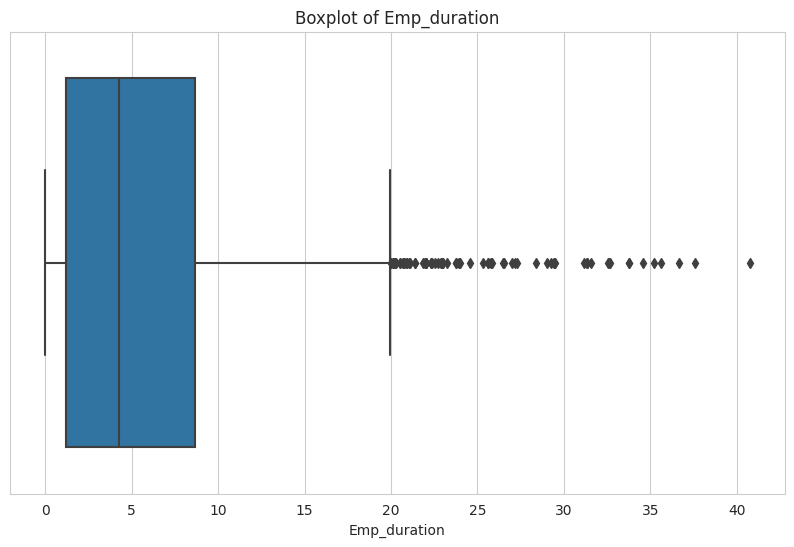

In [308]:
cont_disc_boxplot(df_new,'Emp_duration')

In [309]:
# Calculate the skewness of the 'Emp_duration' column
df_new['Emp_duration'].skew()

1.729907224847527

The mean employment duration among applicants is approximately 6.07 years.

The standard deviation (std) of approximately 6.58 indicates that there is variability in employment durations among applicants.

Employment durations in the dataset range from 0 years (indicating new employees) to a maximum of approximately 40.76 years. This wide range reflects diverse employment histories among applicant

The quartile values (25%, 50%, and 75%) provide insights into the distribution of employment durations. The 25th percentile (Q1) is approximately 1.18 years, the median (50th percentile or Q2) is approximately 4.28 years, and the 75th percentile (Q3) is approximately 8.69 years. These values help in understanding the spread of employment durations and the distribution.

It seems there are many outliers in the Emp_duration column. The age distribution is not perfecly normal(symmetrical), there is minor leftward skewness in the age distribution but it is not extreme.But the visuals are suggesting there is a higly positively skewd(rightward skewed).This is just because skewness vale is sensitive to extreme values or outliers in the dataset.

### **3.2 Bivariate analysiss**

##### **3.2.1 Numerical vs Numerical features**

###### 3.2.1.1 Scatter Plots

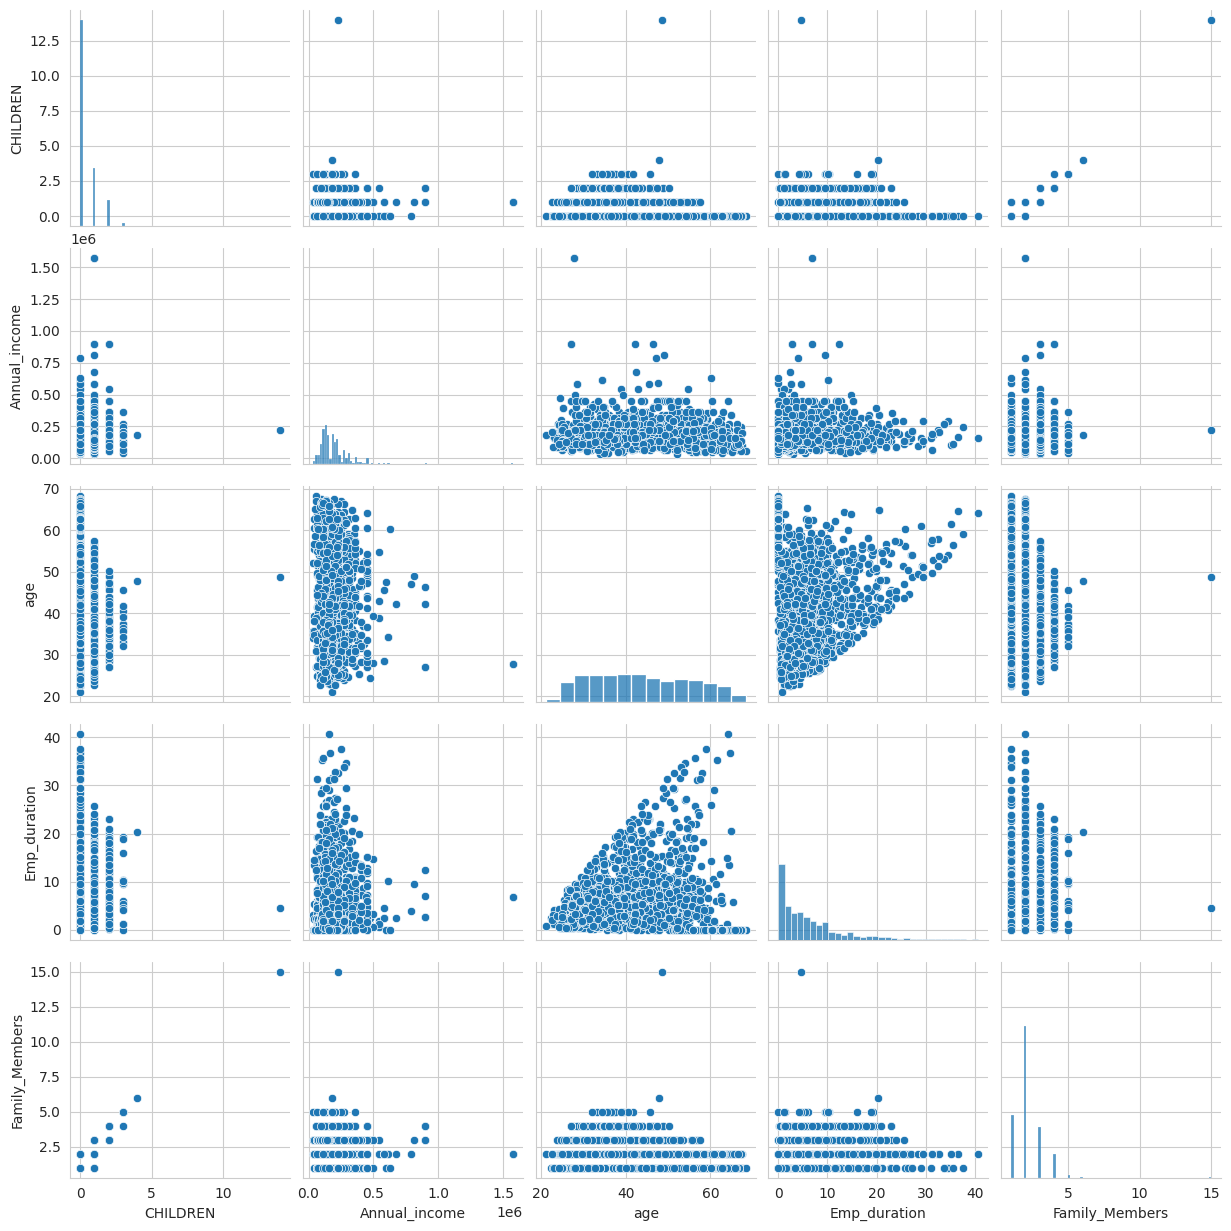

In [310]:
# To check the relationship among the numeric features using scatter plots
sns.pairplot(data = df_new[['CHILDREN',	'Annual_income',	'age', 'Emp_duration', 'Family_Members']], kind = 'scatter')
plt.show()

We observe a strong positive linear correlation between the number of family members and the count of children. This correlation is intuitive, as having more children naturally contributes to a higher family member count. However, this correlation raises concerns about multicollinearity, indicating a high degree of interdependence between these two features. To address this issue, we may need to remove one of them from our analysis.

Another trend is the relationship between the age of applicants and the duration of their employment. This trend resembles an inverted triangle, primarily because the age of applicants tends to increase as their employment duration extends. It's important to note that an applicant cannot have an employment duration exceeding their age, which logically aligns with the observed trend. This pattern aligns with our expectations, as individuals typically accumulate more work experience and age simultaneously, reflecting the idea that longer employment tenure is associated with greater age.


###### 3.2.1.2 Heat map

<ipython-input-311-17da4c5c12e8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap((df_new.drop(['Mobile_phone'], axis = 1)).corr(), annot = True)


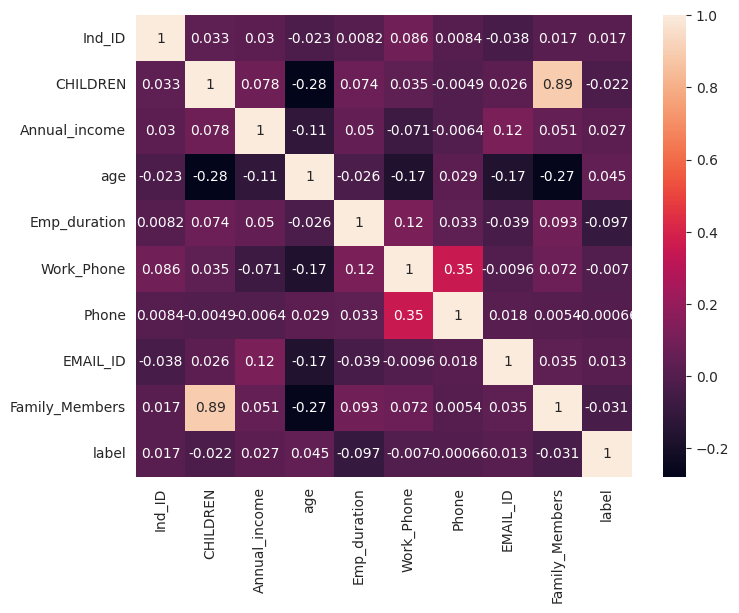

In [311]:
# Using seaborn to create heat map of the correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap((df_new.drop(['Mobile_phone'], axis = 1)).corr(), annot = True)
plt.show()

* No feature exhibits a notable correlation with the target variable.
* Family member count and children count display strong positive correlation.

* A positive correlation exists between having a phone and possessing a work phone.


* A negative correlation is evident between employment duration and age, as previously observed.

##### **3.2.2 Numerical vs categorical features**

##### 3.2.2.1 Boxplots

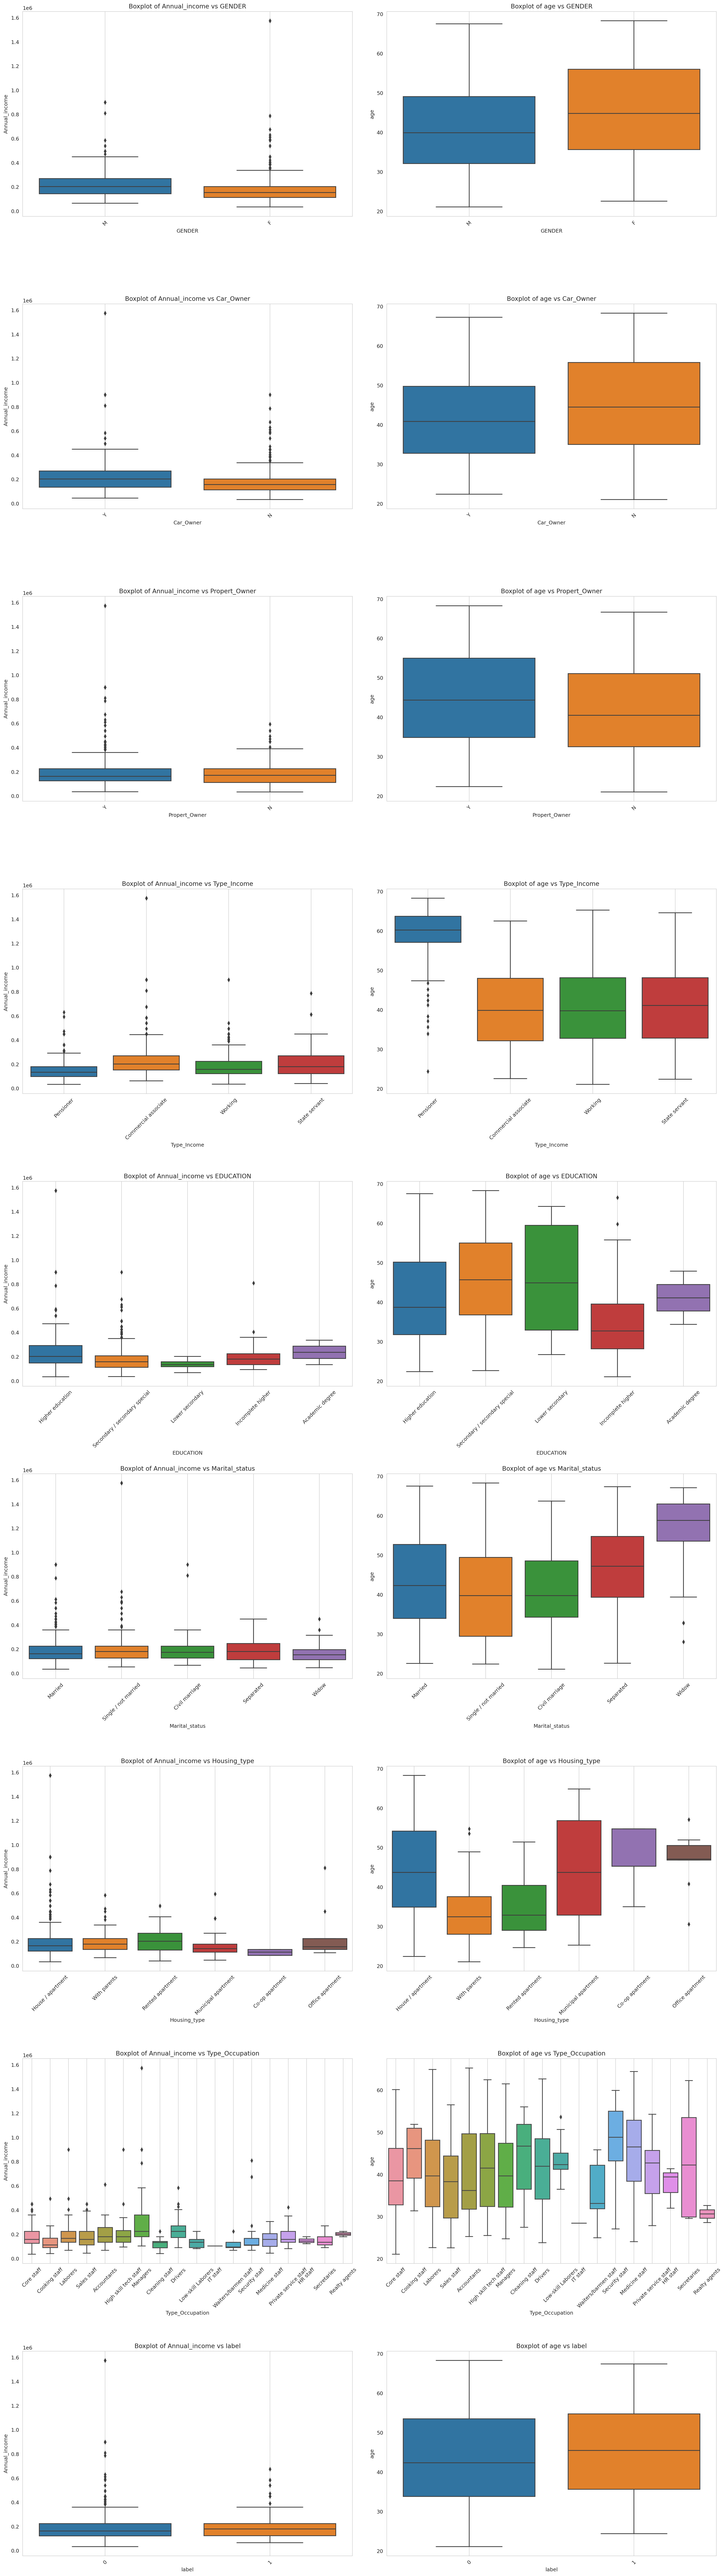

In [312]:
# List of categorical features to plot against
categorical_features = ['GENDER', 'Car_Owner',	'Propert_Owner', 'Type_Income',	'EDUCATION',	'Marital_status',	'Housing_type', 'Type_Occupation','label']

# Numerical features to be used in the boxplots
numerical_features = ['Annual_income','age']

# Create subplots for each categorical feature
fig, axes = plt.subplots(len(categorical_features), len(numerical_features), figsize=(20,70), dpi = 180)

# Creating boxplots for each categorical feature
for i, category in enumerate(categorical_features):
    for j, num in enumerate(numerical_features):
        sns.boxplot(x=category, y=num, data=df_new, ax=axes[i, j])
        axes[i, j].set_title(f'Boxplot of {num} vs {category}')
        axes[i, j].set_xlabel(category)
        axes[i, j].set_ylabel(num)
        axes[i, j].tick_params(axis='x', rotation=45)
        axes[i, j].grid()

plt.tight_layout(pad = 2.0)
plt.show()


* In terms of annual income, males tend to have a slightly higher income compared to females.
* Applicants who own a car tend to have a slightly higher annual income in comparison to those who do not own a car.
* Annual income remains relatively consistent for applicants whether they own property or not.
* Among various income types, pensioners generally have the lowest annual income when compared to other income groups.
* Applicants with lower secondary education levels tend to have the lowest annual income, while those with higher education and academic degrees typically exhibit the highest annual incomes.
* Annual income is slightly lower for widows compared to other marital status groups.
* The annual income of applicants living in rental apartments tends to be the highest, whereas those living in co-op apartments generally have the lowest annual income.
* There is no significant difference between the anuual income of aprroved and rejected credit card applications.

* Female applicants exhibit a higher average age compared to their male counterparts.
* Applicants who do not own a car tend to be older on average.
* Those who own property tend to have a higher average age than those who do not possess property.
* Unsurprisingly, pensioners are generally older than individuals who are currently employed. Notably, there are outliers representing pensioners who retired at a young age.
* It's worth noting that individuals with an incomplete higher degree tend to be younger on average when compared to other educational groups.
* Widows, as a demographic, tend to have a significantly older average age. However, there are outliers within this group, with some individuals in their 30s.
* As expected, individuals who live with their parents tend to be younger. There are also outliers within this category, representing those who do not conform to the average age.
* Those working in security staff roles tend to have an older average age, while individuals in IT positions tend to be younger on average.
*   There is no significant difference difference the age of approved and rejected credit card applications.



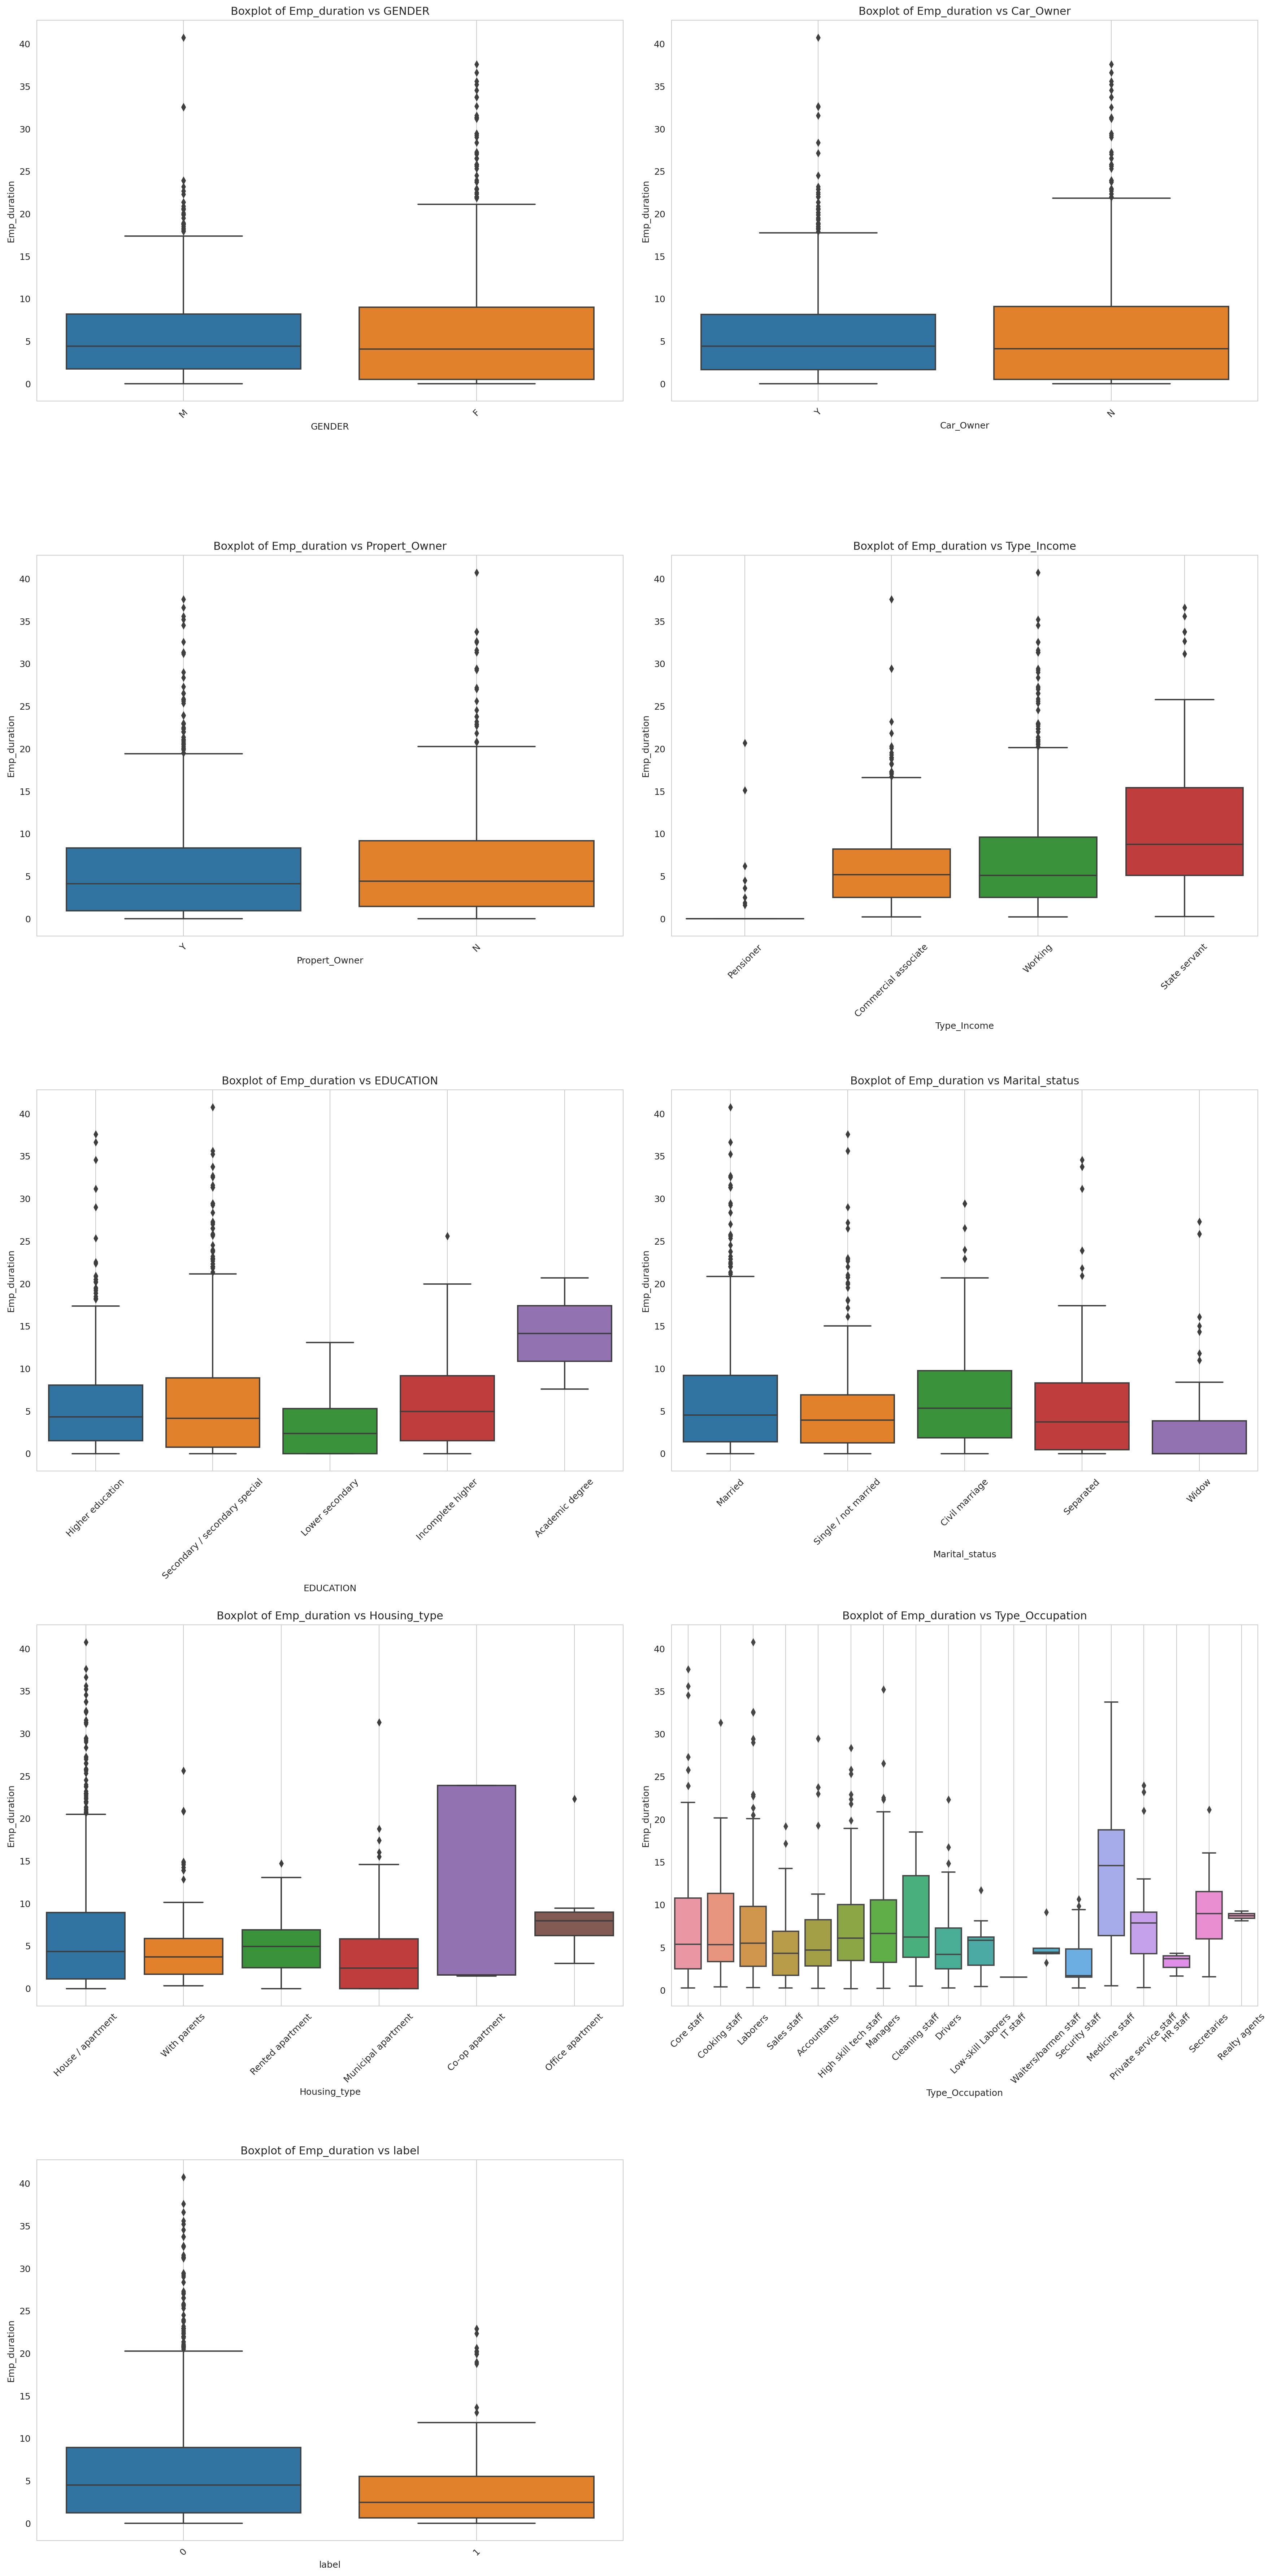

In [313]:
# List of categorical features to plot against
categorical_features = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation', 'label']

# Numerical feature to be used in the boxplots
numerical_feature = 'Emp_duration'

# Create subplots for each categorical feature
fig, axes = plt.subplots(5, 2, figsize=(20, 40), dpi=180)

# Flatten the axes array for easy indexing
axes = axes.ravel()

# Creating boxplots for each categorical feature
for i, category in enumerate(categorical_features):
    sns.boxplot(x=category, y=numerical_feature, data=df_new, ax=axes[i])
    axes[i].set_title(f'Boxplot of {numerical_feature} vs {category}')
    axes[i].set_xlabel(category)
    axes[i].set_ylabel(numerical_feature)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid()

# Remove any remaining empty subplots
for i in range(len(categorical_features), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(pad=2.0)
plt.show()

* Applicants who are currently employed by the state tend to have a longer employment duration compared to other applicant groups, while pensioners typically have zero employment duration.
* Among the various occupational fields, individuals working in the medical field generally exhibit a longer duration of employment compared to applicants in other professions, while individuals working in IT roles typically have the shortest employment duration compared to other occupational categories.
* Applicants holding an academic degree tend to have the longest employment duration, whereas those with a lower secondary education have the shortest employment duration.
*   There is no significant difference between the employment duration of approved and rejected credit card applications.

##### 3.2.2.2  t_test

In [314]:
# Sample data representing age for approved and rejected credit applications
age_approved = df_new[df_new['label'] == 0]['age']
age_rejected = df_new[df_new['label'] == 1]['age']
# Performing two sample t_test to compare mean age of approved and rejected credit applications
from scipy import stats
t_stats, p_value = stats.ttest_ind(age_approved, age_rejected)
# Define the significance level(alpha value)
alpha = 0.05
if p_value < alpha :
  print(f"Reject null hypothesis : There is a significant difference between the age of approved and rejected credit card applications.")
else :
  print(f"Fail to reject null hypothesis : There is no significant difference between the age of approved and rejected credit card applications.")

Fail to reject null hypothesis : There is no significant difference between the age of approved and rejected credit card applications.


In [315]:
# Sample data representing Emp_duration for approved and rejected credit applications
emp_duration_approved = df_new[df_new['label'] == 0]['Emp_duration']
emp_duration_rejected = df_new[df_new['label'] == 1]['Emp_duration']
# Performing two sample t_test to compare mean Emp_duration of approved and rejected credit applications
t_stats, p_value = stats.ttest_ind(age_approved, age_rejected)
# Define the significance level(alpha value)
alpha = 0.05
if p_value < alpha :
  print(f"Reject null hypothesis : There is a significant difference between the Emp_duration of approved and rejected credit card applications.")
else :
  print(f"Fail to reject null hypothesis : There is no significant difference between the Emp_duration of approved and rejected credit card applications.")

Fail to reject null hypothesis : There is no significant difference between the Emp_duration of approved and rejected credit card applications.


In [316]:
# Sample data representing annual income for approved and rejected credit applications
Family_Members_approved = df_new[df_new['label'] == 0]['Annual_income']
Family_Members_rejected = df_new[df_new['label'] == 1]['Annual_income']
# Performing two sample t_test to compare mean annual income of approved and rejected credit applications
t_stats, p_value = stats.ttest_ind(age_approved, age_rejected)
# Define the significance level(alpha value)
alpha = 0.05
if p_value < alpha :
  print(f"Reject null hypothesis : There is a significant difference between the annual income of approved and rejected credit card applications.")
else :
  print(f"Fail to reject null hypothesis : There is no significant difference between the annual income of approved and rejected credit card applications.")

Fail to reject null hypothesis : There is no significant difference between the annual income of approved and rejected credit card applications.


In [317]:
# Sample data representing count of Family Members for approved and rejected credit applications
Family_Members_approved = df_new[df_new['label'] == 0]['Family_Members']
Family_Members_rejected = df_new[df_new['label'] == 1]['Family_Members']
# Performing two sample t_test to compare mean Family_Members of approved and rejected credit applications
t_stats, p_value = stats.ttest_ind(age_approved, age_rejected)
# Define the significance level(alpha value)
alpha = 0.05
if p_value < alpha :
  print(f"Reject null hypothesis : There is a significant difference between the Family_Members of approved and rejected credit card applications.")
else :
  print(f"Fail to reject null hypothesis : There is no significant difference between the Family_Members of approved and rejected credit card applications.")

Fail to reject null hypothesis : There is no significant difference between the Family_Members of approved and rejected credit card applications.


##### **3.2.3 Categorical vs categorical features(Chi-square tests)**

Null hypothesis : There is no significant association between credid card approval status(Label) and other categorical features.

Alternate hypothesis : There is significant association between credit card approval status(Label) and other categorical features.

In [318]:
# Using Chi-square tests to determine if there is a significant association
# between two categorical features in a contingency table
from scipy.stats import chi2_contingency
features = ['GENDER',	'Car_Owner',	'Propert_Owner', 'Type_Income',	'EDUCATION',	'Marital_status',	'Housing_type', 'Type_Occupation']

for feature in features:
    print(f"{feature} and label:")
    contingency_table = pd.crosstab(df_new['label'], df_new[feature])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p_value}")
    print(f"Degrees of freedom: {dof}")
    print("Expected frequencies:")
    print(expected)
    # Interprete the results by choosing significance level(alpha value)
    alpha = 0.05
    if p_value < alpha :
      print(f"Reject null hypothesis : There is significant association between credit card approval status(label) and {feature}.")
    else :
      print(f"Fail to reject null hypothesis : There is no significant association between credit card approval status(label) and {feature}.")
    print("-" * 40)

GENDER and label:
Chi-square statistic: 3.982162865583862
P-value: 0.04598448082256474
Degrees of freedom: 1
Expected frequencies:
[[865.66060999 505.33939001]
 [107.33939001  62.66060999]]
Reject null hypothesis : There is significant association between credit card approval status(label) and GENDER.
----------------------------------------
Car_Owner and label:
Chi-square statistic: 0.24788350240956675
P-value: 0.6185693269675412
Degrees of freedom: 1
Expected frequencies:
[[819.54263566 553.45736434]
 [104.45736434  70.54263566]]
Fail to reject null hypothesis : There is no significant association between credit card approval status(label) and Car_Owner.
----------------------------------------
Propert_Owner and label:
Chi-square statistic: 0.3846791805488348
P-value: 0.5351095955412992
Degrees of freedom: 1
Expected frequencies:
[[477.17958656 895.82041344]
 [ 60.82041344 114.17958656]]
Fail to reject null hypothesis : There is no significant association between credit card approval

# 4. **Data cleaning and preprocessing**

### **4.0 Missing value handling**

##### **4.0.1 Mode imputation of Gender**

In [319]:
# Fill the missing value with the mode
mode_gender = df_new['GENDER'].mode()[0]
df_new['GENDER'].fillna(mode_gender, inplace=True)

# Checking for the number of missing values in this column after imputation
df_new['GENDER'].isnull().sum()

0

##### **4.0.2 Median imputation of Annual income**

In [320]:
# Fill the missing values with the median
median_annual_income = df_new['Annual_income'].median()
df_new['Annual_income'].fillna(median_annual_income, inplace=True)

# Checking for the number of missing values in this column after imputation
df_new['Annual_income'].isnull().sum()

0

##### **4.0.3 Mean imputation of Age**

In [321]:
# Fill the missing values with the mean
mean_age = df_new['age'].mean()
df_new['age'].fillna(mean_age, inplace=True)

# Checking for the number of missing values in this column after imputation
df_new['age'].isnull().sum()

0

##### **4.0.4 Mode imputation of 'Type_Occupation'**

In [322]:
# Fill the missing value with the mode
mode_Type_Occupation = df_new['Type_Occupation'].mode()[0]
df_new['Type_Occupation'].fillna(mode_Type_Occupation, inplace=True)

# Checking for the number of missing values in this column after imputation
df_new['Type_Occupation'].isnull().sum()

0

### ***4.1 Outlier treatment***

In [323]:
# Define a user-defined function to remove outliers from specified features
# using IQR(Inter Quartile Range) method
def remove_outliers(df_new, feature, threshold = 3):
        Q1 = df_new[feature].quantile(0.25)  # 25% quantile
        Q3 = df_new[feature].quantile(0.75)  # 75% quantile
        IQR = Q3 - Q1                         # Remove the data outside of 3 * IQR
        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR
        df_new = df_new[(df_new[feature] >= lower_bound) & (df_new[feature] <= upper_bound)]
        return df_new

# List of features to process for outlier removal where outliers exist
features_to_process = ['Annual_income', 'Emp_duration', 'Family_Members']

# Iterate over each feature and remove outliers
# to get a cleaned dataframe with outliers removed for the specified features.
for feature in features_to_process:
    df_new = remove_outliers(df_new, feature)

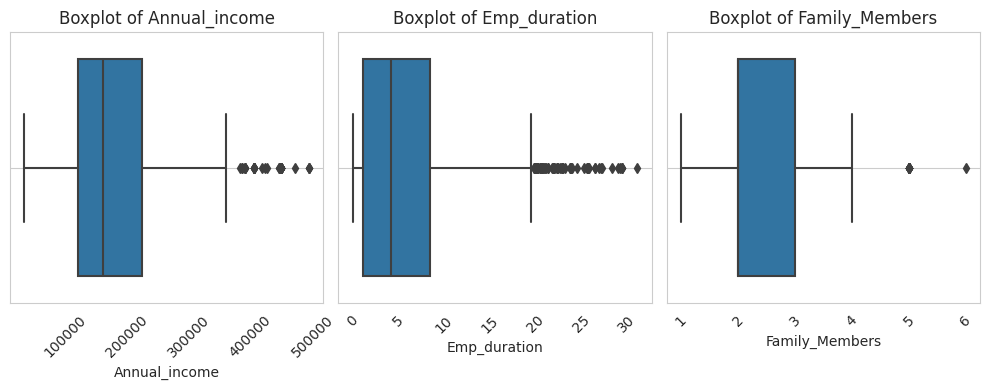

In [324]:
# Check for the outliers after removal of outliers from the dataframe
# Create subplots for each categorical feature
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
# Flatten the axes array for easy indexing
axes = axes.ravel()
# Creating boxplots for each categorical feature
for i, category in enumerate(features_to_process):
    sns.boxplot(x=category, data=df_new, ax=axes[i])
    axes[i].set_title(f'Boxplot of {category}')
    axes[i].set_xlabel(category)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid()
plt.tight_layout()
plt.show()

### **4.x Write the cleaned DataFrame to a CSV file**

In [325]:
# Writing the cleaned DataFrame to a CSV file
# so that I can analyse it later using MySQL
df_new.to_csv('Credit_card_approval_cleaned.csv', index=False)

### **4.2 Drop features**


We are dropping these features for the following reasons:

Ind_ID: This feature is no longer useful for prediction. It was initially used for merging two datasets, but after the merge, it serves no purpose in the prediction task.

Mobile_phone: Since every individual in the dataset is assumed to have a mobile phone, this feature does not provide any discriminatory information. It lacks variability and does not contribute to distinguishing between different individuals.

CHILDREN: This feature is highly correlated with the Family_Members count. To avoid multicollinearity in our predictive model, we choose to drop it.

In [326]:
# Define a user-defined function to drop multiple features
def drop_multiple_features(df, features_to_drop):
    df_new.drop(columns=features_to_drop, inplace=True)

# List of features to drop
features_to_drop = ['Ind_ID', 'Mobile_phone','CHILDREN']

# Call the user-defined function to drop multiple features
drop_multiple_features(df_new, features_to_drop)

# Display the first five rows of resulting DataFrame
df_new.head()

GENDER Car_Owner Propert_Owner  Annual_income           Type_Income  \
0      M         Y             Y       180000.0             Pensioner   
1      F         Y             N       315000.0  Commercial associate   
2      F         Y             N       315000.0  Commercial associate   
3      F         Y             N       166500.0  Commercial associate   
4      F         Y             N       315000.0  Commercial associate   

          EDUCATION Marital_status       Housing_type        age  \
0  Higher education        Married  House / apartment  51.394935   
1  Higher education        Married  House / apartment  37.117043   
2  Higher education        Married  House / apartment  43.916063   
3  Higher education        Married  House / apartment  37.117043   
4  Higher education        Married  House / apartment  37.117043   

   Emp_duration  Work_Phone  Phone  EMAIL_ID Type_Occupation  Family_Members  \
0      0.000000           0      0         0        Laborers               2   
1      1.604381           1      1         0        Laborers               2   
2      1.604381           1      1         0        Laborers               2   
3      1.604381           1      1         0        Laborers               2   
4      1.604381           1      1         0        Laborers               2   

   label  
0      1  
1      1  
2      1  
3      1  
4      1

### **4.3 One-hot encoding**

In [327]:
# User-defined function for one-hot encoding multiple features
def one_hot_encode_features(df_new, features_to_encode):
    for feature in features_to_encode:
        dummies = pd.get_dummies(df_new[feature], prefix=feature)
        df_new = pd.concat([df_new, dummies], axis=1)
        df_new.drop(columns=[feature], inplace=True)
    return df_new

# List of features to one-hot encode
features_to_encode = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'Marital_status','Housing_type', 'Work_Phone', 'Phone', 'EMAIL_ID']

# Call the user-defined function to one-hot encode the specified features
df_new = one_hot_encode_features(df_new, features_to_encode)

# Display the first five rows of resulting DataFrame with one-hot encoded features
df_new.head()

Annual_income         EDUCATION        age  Emp_duration Type_Occupation  \
0       180000.0  Higher education  51.394935      0.000000        Laborers   
1       315000.0  Higher education  37.117043      1.604381        Laborers   
2       315000.0  Higher education  43.916063      1.604381        Laborers   
3       166500.0  Higher education  37.117043      1.604381        Laborers   
4       315000.0  Higher education  37.117043      1.604381        Laborers   

   Family_Members  label  GENDER_F  GENDER_M  Car_Owner_N  ...  \
0               2      1         0         1            0  ...   
1               2      1         1         0            0  ...   
2               2      1         1         0            0  ...   
3               2      1         1         0            0  ...   
4               2      1         1         0            0  ...   

   Housing_type_Municipal apartment  Housing_type_Office apartment  \
0                                 0                              0   
1                                 0                              0   
2                                 0                              0   
3                                 0                              0   
4                                 0                              0   

   Housing_type_Rented apartment  Housing_type_With parents  Work_Phone_0  \
0                              0                          0             1   
1                              0                          0             0   
2                              0                          0             0   
3                              0                          0             0   
4                              0                          0             0   

   Work_Phone_1  Phone_0  Phone_1  EMAIL_ID_0  EMAIL_ID_1  
0             0        1        0           1           0  
1             1        0        1           1           0  
2             1        0        1           1           0  
3             1        0        1           1           0  
4             1        0        1           1           0  

[5 rows x 34 columns]

### **4.4 Binary encoding**

In [328]:
! pip install category-encoders

In [329]:
# Import category_encoders library
import category_encoders as ce

# Initialize the binary encoder
binary_encoder = ce.BinaryEncoder(cols=['Type_Occupation'])

# Apply binary encoding to the 'occupation_type' column
df_new_encoded = binary_encoder.fit_transform(df_new['Type_Occupation'])

# Add the binary encoded column to the dataframe
# and drop the 'Type_Occupation' column after encoding
df_new = pd.concat([df_new, df_new_encoded ], axis=1)
df_new.drop(columns=['Type_Occupation'], inplace=True)

# Display the resulting DataFrame
df_new.head()

Annual_income         EDUCATION        age  Emp_duration  Family_Members  \
0       180000.0  Higher education  51.394935      0.000000               2   
1       315000.0  Higher education  37.117043      1.604381               2   
2       315000.0  Higher education  43.916063      1.604381               2   
3       166500.0  Higher education  37.117043      1.604381               2   
4       315000.0  Higher education  37.117043      1.604381               2   

   label  GENDER_F  GENDER_M  Car_Owner_N  Car_Owner_Y  ...  Work_Phone_1  \
0      1         0         1            0            1  ...             0   
1      1         1         0            0            1  ...             1   
2      1         1         0            0            1  ...             1   
3      1         1         0            0            1  ...             1   
4      1         1         0            0            1  ...             1   

   Phone_0  Phone_1  EMAIL_ID_0  EMAIL_ID_1  Type_Occupation_0  \
0        1        0           1           0                  0   
1        0        1           1           0                  0   
2        0        1           1           0                  0   
3        0        1           1           0                  0   
4        0        1           1           0                  0   

   Type_Occupation_1  Type_Occupation_2  Type_Occupation_3  Type_Occupation_4  
0                  0                  0                  0                  1  
1                  0                  0                  0                  1  
2                  0                  0                  0                  1  
3                  0                  0                  0                  1  
4                  0                  0                  0                  1  

[5 rows x 38 columns]

### **4.5 Ordinal encoding**

In [330]:
from sklearn.preprocessing import OrdinalEncoder

# Define the ordinal encoding mapping
ordinal_mapping = {
    'Lower secondary': 1,
    'Secondary / secondary special': 2,
    'Incomplete higher': 3,
    'Higher education': 4,
    'Academic degree': 5
}

# Initialize the ordinal encoder with the mapping
ordinal_encoder = OrdinalEncoder(categories=[list(ordinal_mapping.keys())], dtype=int)

# Apply ordinal encoding to the 'EDUCATION' column
df_new['Education_encoded'] = ordinal_encoder.fit_transform(df_new[['EDUCATION']])

# Drop the original 'EDUCATION' column
df_new.drop(columns=['EDUCATION'], inplace=True)

# Display the first five rows of resulting DataFrame
df_new.head()

Annual_income        age  Emp_duration  Family_Members  label  GENDER_F  \
0       180000.0  51.394935      0.000000               2      1         0   
1       315000.0  37.117043      1.604381               2      1         1   
2       315000.0  43.916063      1.604381               2      1         1   
3       166500.0  37.117043      1.604381               2      1         1   
4       315000.0  37.117043      1.604381               2      1         1   

   GENDER_M  Car_Owner_N  Car_Owner_Y  Propert_Owner_N  ...  Phone_0  Phone_1  \
0         1            0            1                0  ...        1        0   
1         0            0            1                1  ...        0        1   
2         0            0            1                1  ...        0        1   
3         0            0            1                1  ...        0        1   
4         0            0            1                1  ...        0        1   

   EMAIL_ID_0  EMAIL_ID_1  Type_Occupation_0  Type_Occupation_1  \
0           1           0                  0                  0   
1           1           0                  0                  0   
2           1           0                  0                  0   
3           1           0                  0                  0   
4           1           0                  0                  0   

   Type_Occupation_2  Type_Occupation_3  Type_Occupation_4  Education_encoded  
0                  0                  0                  1                  3  
1                  0                  0                  1                  3  
2                  0                  0                  1                  3  
3                  0                  0                  1                  3  
4                  0                  0                  1                  3  

[5 rows x 38 columns]

### **4.6 Skewness handling**

##### **4.6.1 Square root transformation of age**

In [331]:
# Degree of skewness before transformation
skew_1 = df_new['age'].skew()

# Apply a square root transformation to the "age" column
df_new['age'] = np.sqrt(df_new['age'])

# Degree of skewness after transformation
skew_2 = df_new['age'].skew()

print(f"Skewness before transformation: {skew_1}")
print(f"Skewness after transformation: {skew_2}")

Skewness before transformation: 0.18723792316957863
Skewness after transformation: -0.004405744465522656


##### **4.6.2 Log transformation of Emp_duration**

In [332]:
# Degree of skewness before transformation
skew_1 = df_new['Emp_duration'].skew()

# Apply a log transformation to the "Emp_duration" column
df_new['Emp_duration'] = np.log(df_new['Emp_duration']+1)

# Degree of skewness after transformation
skew_2 = df_new['Emp_duration'].skew()

print(f"Skewness before transformation: {skew_1}")
print(f"Skewness after transformation: {skew_2}")

Skewness before transformation: 1.4168459320235454
Skewness after transformation: -0.18236432848503775


##### **4.6.3 Power transformation(Yeo-Johnson) of Annual_income**

In [333]:
# Degree of skewness before transformation
skew_1 = df_new['Annual_income'].skew()

from scipy import stats

# Apply the Yeo-Johnson transformation to the "Emp_duration" column
df_new['Annual_income'], _  = stats.yeojohnson(df_new['Annual_income'])

# Degree of skewness after transformation
skew_2 = df_new['Annual_income'].skew()

print(f"Skewness before transformation: {skew_1}")
print(f"Skewness after transformation: {skew_2}")

Skewness before transformation: 1.1076076902224625
Skewness after transformation: -0.0007502407750674775


### **4.7 Balancing dataset using SMOTE**

In [334]:
# Check the class distribution in 'label' column before oversampling
class_distribution = df_new['label'].value_counts()
print(class_distribution)

0    1343
1     170
Name: label, dtype: int64


In [335]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separate the features (x) and the target variable (y)
x = df_new.drop(columns=['label'])
y = df_new['label']

# Initialize SMOTE with a desired sampling strategy (e.g., 'auto' for equalize)
smote = SMOTE(sampling_strategy='auto', random_state=10)

# Apply SMOTE to oversample the minority class
x_resampled, y_resampled = smote.fit_resample(x, y)

# Create a new DataFrame with the resampled data
df_new = pd.concat([x_resampled, y_resampled], axis=1)

# Check the class distribution in the resampled dataset
class_distribution = df_new['label'].value_counts()
print(class_distribution)


1    1343
0    1343
Name: label, dtype: int64


### **4.8 Splitting dataset into target and features**

In [336]:
# Split the dataset into target(dependent variable)
# and features(independent varibles)
X = df_new.drop('label', axis = 1)
Y = df_new['label']

### **4.9 Splitting dataset into training and test sets**

In [337]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=12)

### **4.10 Feature Scaling using Standard Scaler**

In [338]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Select the features to be scaled
features_to_scale = ['age', 'Emp_duration', 'Annual_income']

# Fit and transform the training data
X_train[features_to_scale] = scaler.fit_transform(X_train[features_to_scale])

# Transform the test data using the same scaling parameters
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])

## **5. Model Training and evaluation**

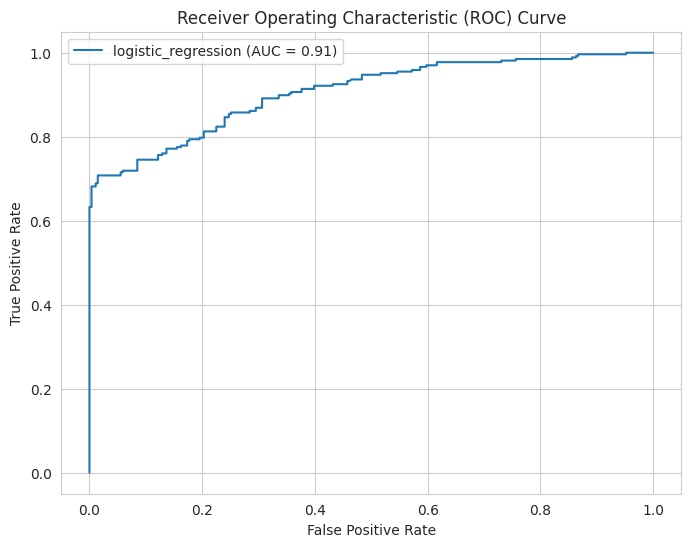

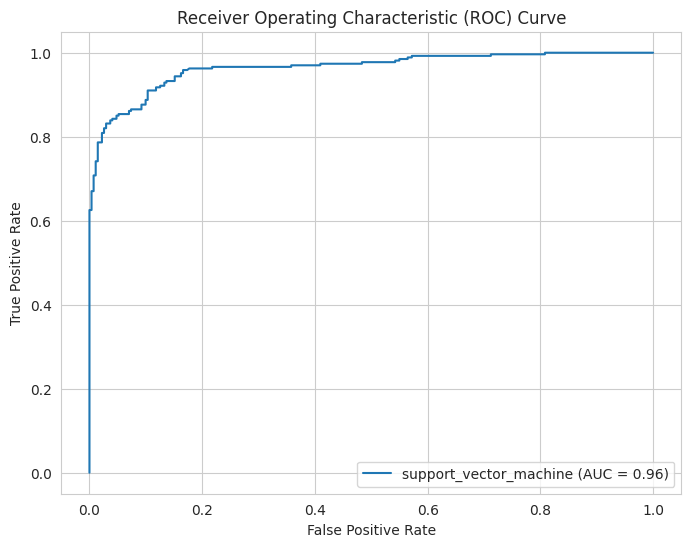

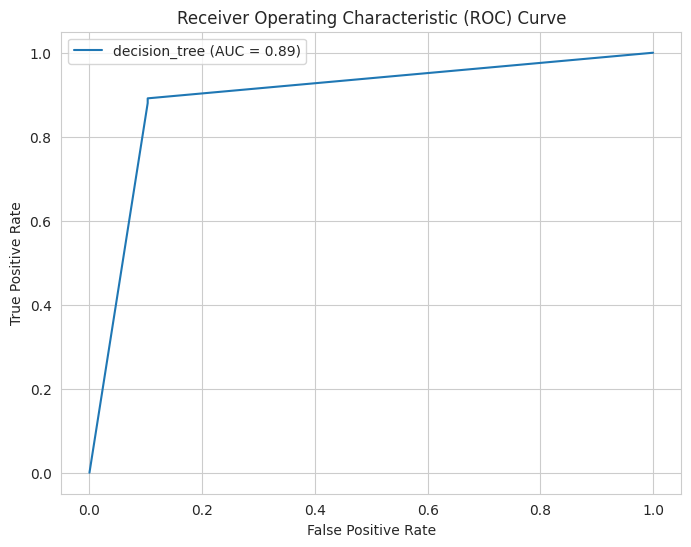

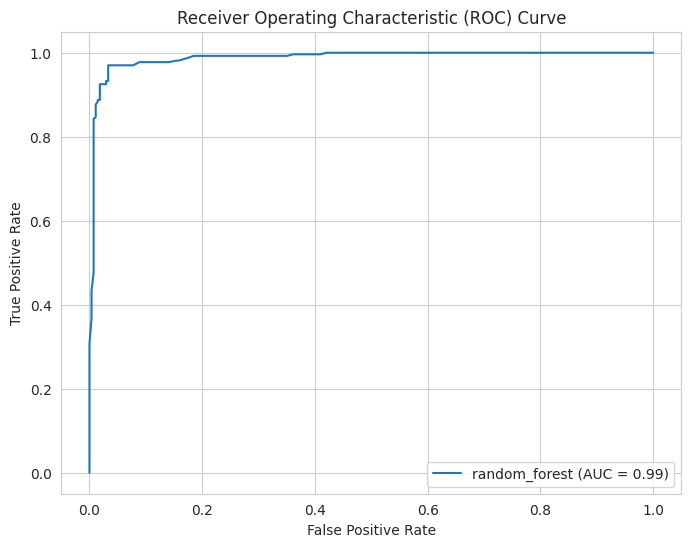

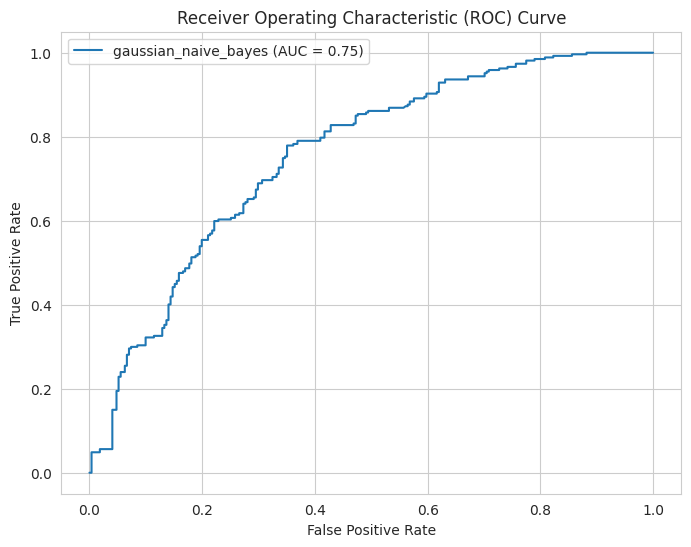

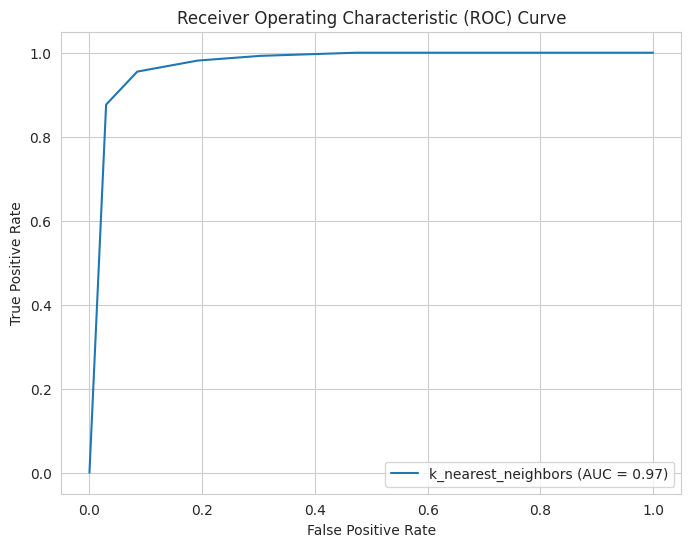

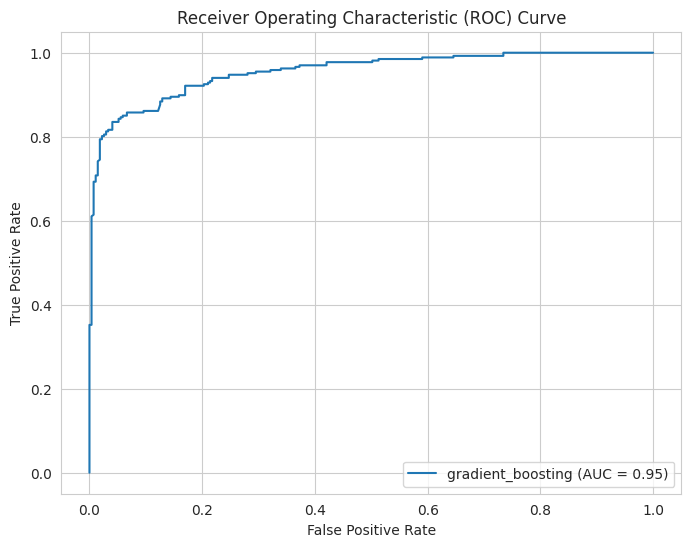

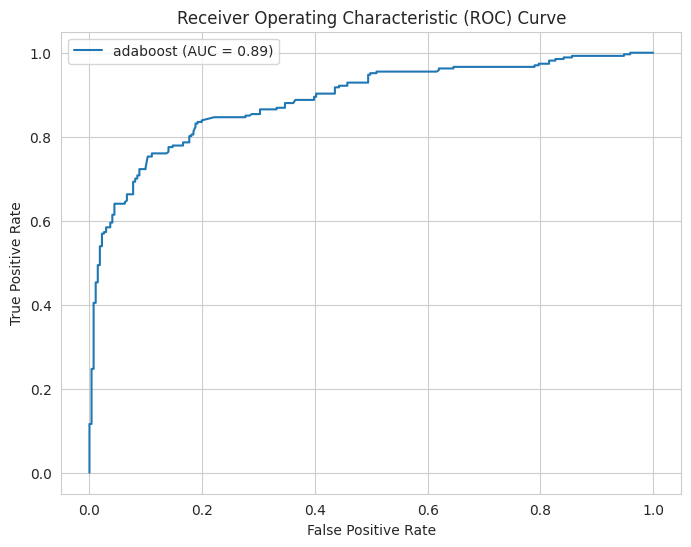

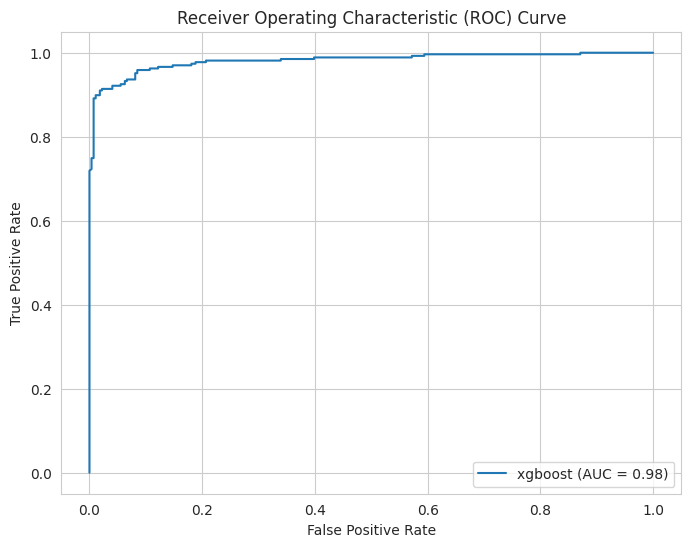

Classification Report for logistic_regression:
              precision    recall  f1-score   support

           0       0.77      0.94      0.85       271
           1       0.93      0.72      0.81       267

    accuracy                           0.83       538
   macro avg       0.85      0.83      0.83       538
weighted avg       0.85      0.83      0.83       538

Classification Report for support_vector_machine:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       271
           1       0.89      0.89      0.89       267

    accuracy                           0.89       538
   macro avg       0.89      0.89      0.89       538
weighted avg       0.89      0.89      0.89       538

Classification Report for decision_tree:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       271
           1       0.89      0.89      0.89       267

    accuracy                           0.89 

In [339]:

# Initialize differenet classification models
models = {
    'logistic_regression':LogisticRegression(random_state=42,max_iter=1000),
    'support_vector_machine':SVC(random_state=42,probability=True),
    'decision_tree':DecisionTreeClassifier(random_state=42),
    'random_forest':RandomForestClassifier(random_state=42),
    'gaussian_naive_bayes':GaussianNB(),
    'k_nearest_neighbors':KNeighborsClassifier(),
    'gradient_boosting':GradientBoostingClassifier(random_state=42),
    'adaboost':AdaBoostClassifier(random_state=42),
    'xgboost':XGBClassifier(random_state=42)
    }

# Create dictionaries to store classification reports and ROC AUC scores
classification_reports = {}
roc_auc_scores = {}

# Loop through each model, train it, and evaluate it
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)

    # Predict on the test data
    y_pred = model.predict(X_test)

    # Generate a classification report
    report = classification_report(Y_test, y_pred)
    classification_reports[model_name] = report

    # Calculate ROC AUC score and ROC curve
    y_prob = model.predict_proba(X_test)[:, 1]
    roc_auc = roc_auc_score(Y_test, y_prob)
    fpr, tpr, _ = roc_curve(Y_test, y_prob)

    roc_auc_scores[model_name] = roc_auc

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Display classification reports
for model_name, report in classification_reports.items():
    print(f"Classification Report for {model_name}:\n{report}")

# Display ROC AUC scores
for model_name, roc_auc in roc_auc_scores.items():
    print(f"ROC AUC Score for {model_name}: {roc_auc:.2f}")

ROC AUC Score: The Random Forest Classifier has the highest ROC AUC score of 0.99
among all the models. This indicates that the Random Forest model is very effective
at discriminating between the two classes, making it particularly suitable when we
want to minimize both false positives and false negatives equally.

F1 Score: The Random Forest Classifier has highest F1 score  of 0.96 compared to
other models. The F1 score provides a balance between precision and recall, and
a score of 0.96 suggests that the model can effectively balance false positives
and false negatives.

Considering both metrics ROC AUC score and F1 score, the Random Forest Classifier
demonstrates strong overall performance in the given classification task.

## **6. Hyperparameters Tuning and Cross Validation**

In [340]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300,400,500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 4, 8]
}

# Create a RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV to your training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Perform k-fold cross-validation(k = 5) with the best model
cv_scores = cross_val_score(best_rf_model, X_train, Y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Score: {cv_scores.mean()}")

# Fit the best model on the full training dataset
best_rf_model.fit(X_train, Y_train)

# Make predictions on the test dataset
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("test Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Cross-Validation Scores: [0.94883721 0.95813953 0.93953488 0.95104895 0.94638695]
Mean CV Score: 0.9487895050685747
test Accuracy: 0.9572490706319703


The test accuracy of the tuned model is approximately 95.72%, which is very close to the initial model accuracy of 96%(but slighly lower than the initial model).The mean cross-validation score was approximately 94.88%, which is slightly lower than the initial accuracy of 96%.

Hyperparameter tuning helped find the best hyperparameters for the RandomForestClassifier, which can lead to better performance on unseen data.

By performing cross-validation, we ensure that the model's performance is not overly dependent on a particular train-test split, making it more robust.

While the test accuracy of the tuned model is slightly lower than the initial model, the mean cross-validation score provides a more realistic estimate of how well the model generalizes to unseen data. It indicates that the tuned model is likely to perform consistently well on different subsets of the training data.